# CAPSTONE PROJECT :
In this project we work on Women's Clothes Reviews to find broad trends in the written thoughts of the customers.For Analysis  we use Natural Language Processing (NLP) for better understanding.

One of the challenges in the project is to extract useful information from the "Reviex Text" varible using text mining techniques
The other challenge is that we need to convert text files into numeric feature vector to run machine learning algorithms.

## 1.LIBRARIES WE USE IN THE PROJECT

[nltk_data] Downloading package punkt to
[nltk_data]     C:\Users\patel\AppData\Roaming\nltk_data...
[nltk_data]   Package punkt is already up-to-date!
[nltk_data] Downloading package stopwords to
[nltk_data]     C:\Users\patel\AppData\Roaming\nltk_data...
[nltk_data]   Package stopwords is already up-to-date!
[nltk_data] Downloading package wordnet to
[nltk_data]     C:\Users\patel\AppData\Roaming\nltk_data...
[nltk_data]   Package wordnet is already up-to-date!


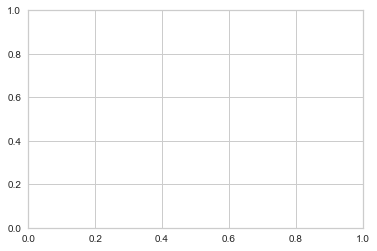

In [1]:
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
import re
import plotly.express as px
import plotly.graph_objects as go
import scipy.stats as stats
import statsmodels.api as sm
import statsmodels.formula.api as smf
#import missingno as msno 

from sklearn.linear_model import LogisticRegression
from sklearn.naive_bayes import MultinomialNB, BernoulliNB
from sklearn.svm import LinearSVC
from sklearn.ensemble import RandomForestClassifier
from sklearn.ensemble import AdaBoostClassifier
from sklearn.neighbors import KNeighborsClassifier
from sklearn.model_selection import train_test_split

import nltk
nltk.download("punkt")
nltk.download('stopwords')
nltk.download('wordnet')
import nltk
from nltk.tokenize import sent_tokenize, word_tokenize
from nltk.corpus import stopwords
from nltk.stem import WordNetLemmatizer
from nltk.stem import PorterStemmer
from collections import Counter
from wordcloud import WordCloud 
from sklearn.metrics import plot_confusion_matrix, classification_report, f1_score, recall_score
from sklearn.metrics import precision_recall_curve, average_precision_score

from yellowbrick.classifier import PrecisionRecallCurve

# Importing plotly and cufflinks in offline mode
import cufflinks as cf
import plotly.express as px
import plotly.offline
cf.go_offline()
cf.set_config_file(offline=False, world_readable=True)

# Ignore Warnings
import warnings
warnings.filterwarnings("ignore")
warnings.warn("this will not show")

# Figure&Display options
%matplotlib inline
fig, ax = plt.subplots()
plt.rcParams["figure.figsize"] = (12, 8) 
pd.set_option('max_colwidth', 200)
pd.set_option('display.max_rows', 1000)
pd.set_option('display.max_columns', 200)
pd.set_option('display.float_format', lambda x: '%.2f' % x)

import colorama
from colorama import Fore, Style  # maakes strings colored
from termcolor import colored

import ipywidgets
from ipywidgets import interact

import pandas_profiling
from pandas_profiling.report.presentation.flavours.html.templates import create_html_assets

## 2.DATA

##### 2.1 Context
Outfits are an important element of a female character which emphasizes her attractiveness and creates the individual image.Clothing is a self-expression of a woman, her way of life.

In this context, the basic goal of this project is to predict 
whether customers, especially assumed as women, recommend the product they purchased using the information in their Review 
Text. Especially, it should be noted that the expectation in this project is to use only the "Review Text" variable and 
neglect the other ones. Of course, if you want, you can work on other variables individually.

The data is a collection of 
22641 Rows and 10 column variables. Each row includes a written comment as well as additional customer information. Also 
each row corresponds to a customer review, and includes the variables. Because this is real commercial data, it has been 
anonymized, and references to the company in the review text and body have been replaced with "retailer".

##### 2.2 About the Features
1) Clothing ID: Integer Categorical variable that refers to the specific piece being reviewed.

2) Age: Positive Integer variable of the reviewers age.

3) Title: String variable for the title of the review.

4) Review Text: String variable for the review body.

5) Rating: Positive Ordinal Integer variable for the product score granted by the customer from 1 Worst, to 5 Best.

6) Recommended IND: Binary variable stating where the customer recommends the product where 1 is recommended, 0 is not recommended.

7) Positive Feedback Count: Positive Integer documenting the number of other customers who found this review positive.

8) Division Name: Categorical name of the product high level division.

9) Department Name: Categorical name of the product department name.

10) Class Name: Categorical name of the product class name.

## 3.ANALYSIS

In [2]:
df0 = pd.read_csv("Women_Dresses_Dataset.csv")
df0

s.no  age   division_name department_name class_name  clothing_id  \
0          0   40         General         Bottoms      Jeans         1028   
1          1   62  General Petite            Tops    Blouses          850   
2          2   47  General Petite         Bottoms     Skirts          993   
3          3   45  General Petite         Bottoms      Pants         1068   
4          4   37       Initmates        Intimate       Swim           24   
...      ...  ...             ...             ...        ...          ...   
23481  23481   44  General Petite         Dresses    Dresses         1081   
23482  23482   39         General         Dresses    Dresses         1110   
23483  23483   29  General Petite            Tops      Knits          862   
23484  23484   57         General         Dresses    Dresses         1082   
23485  23485   56         General         Jackets    Jackets          984   

                                       title  \
0                       Amazing fit and wash   
1                         Lovely and unique!   
2                                        Meh   
3                                        Wow   
4                     Great for bigger busts   
...                                      ...   
23481                               Love it!   
23482                            Great piece   
23483                 So soft and flattering   
23484  Another winner from isabella sinclair   
23485                                    NaN   

                                                                                                                                                                                                   review_text  \
0      Like other reviewers i was hesitant to spend this much on a pair of jeans. however, i purchased them at  20% off on retailer day and...honestly...they look so good i probably would have paid full ...   
1      As is true of a bunch of the fall clothing photos, the colors are totally washed out in these model images which is such a shame. the embroidery is bright and vivid and totally unique on this! the...   
2                                       I so wanted this skirt to work, love the design! but, it's way, way too long... i am 5, 5, 116lb, and the small is 1 inch on the floor. i step on the skirt as i walk.   
3      Love love this! i was hesitant to buy this at first - the reviews made it seem so big and i wasn't sure if it was my kind of outfit. but i wanted to try a jumpsuit and this was the perfect find! t...   
4      I absolutely love the retro look of this swimsuit. i first saw it on blogger amber fillerup-clark (barefoot blonde) and i knew i had to have it. this is the first one piece suit i've purchased in ...   
...                                                                                                                                                                                                        ...   
23481  I oot this dress in the blue. it fits great--hits at the knee, not too short or awkwardly long. i just wish they had it in short sleeve so i could wear one for the summer. beautiful and easy to we...   
23482  I was very patient with this dress. i was waiting almost forever till this dress gets on sale. when i tried my usual 6 size it was way too tight but i could zip it. ( i am 5'6'' 145 lbs). the dres...   
23483  The deep v doesn't gape, and flatters the neckline, while the waist-high side slits reveal enough to keep this drapey shirt from looking shapeless. the material is so lovely and soft and comfy, bu...   
23484  I saw this dress online this morning, went into a store this afternoon and walked out with it! i love this brand because the designs are modest, but feminine and practical. this dress is made of a...   
23485                                                                                                                                              Super cute jacket .perfect for fall i can't stop 

In [3]:
df = df0.copy()

### 3.1 EXPLORATORY DATA ANALYSIS(EDA) & VISUALIZATION

#### 3.1 A General Looking at the Data

In [4]:
df.profile_report()

Summarize dataset:   0%|          | 0/5 [00:00<?, ?it/s]

Generate report structure:   0%|          | 0/1 [00:00<?, ?it/s]

Render HTML:   0%|          | 0/1 [00:00<?, ?it/s]

In [5]:
df.columns

Index(['s.no', 'age', 'division_name', 'department_name', 'class_name',
       'clothing_id', 'title', 'review_text', 'alike_feedback_count', 'rating',
       'recommend_index '],
      dtype='object')

In [6]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 23486 entries, 0 to 23485
Data columns (total 11 columns):
 #   Column                Non-Null Count  Dtype 
---  ------                --------------  ----- 
 0   s.no                  23486 non-null  int64 
 1   age                   23486 non-null  int64 
 2   division_name         23472 non-null  object
 3   department_name       23472 non-null  object
 4   class_name            23472 non-null  object
 5   clothing_id           23486 non-null  int64 
 6   title                 19676 non-null  object
 7   review_text           22641 non-null  object
 8   alike_feedback_count  23486 non-null  int64 
 9   rating                23486 non-null  int64 
 10  recommend_index       23486 non-null  int64 
dtypes: int64(6), object(5)
memory usage: 2.0+ MB


In [7]:
df.shape

(23486, 11)

###### Missing Value

In [8]:
def missing_values(df):
    missing_number = df.isnull().sum().sort_values(ascending=False)
    missing_percent = (df.isnull().sum()/df.isnull().count()).sort_values(ascending=False)
    missing_values = pd.concat([missing_number, missing_percent], axis=1, keys=['Missing_Number', 'Missing_Percent'])
    return missing_values[missing_values['Missing_Number']>0]


missing_values(df)

Missing_Number  Missing_Percent
title                      3810             0.16
review_text                 845             0.04
division_name                14             0.00
department_name              14             0.00
class_name                   14             0.00

In [9]:
df.nunique()

s.no                    23486
age                        77
division_name               3
department_name             6
class_name                 20
clothing_id              1206
title                   13993
review_text             22634
alike_feedback_count       82
rating                      5
recommend_index             2
dtype: int64

In [10]:
df.columns

Index(['s.no', 'age', 'division_name', 'department_name', 'class_name',
       'clothing_id', 'title', 'review_text', 'alike_feedback_count', 'rating',
       'recommend_index '],
      dtype='object')

In [11]:
df.sample(3)

s.no  age   division_name department_name class_name  clothing_id  \
11050  11050   38         General            Tops   Sweaters          927   
7433    7433   34         General            Tops    Blouses          828   
10005  10005   48  General Petite         Dresses    Dresses         1076   

                   title  \
11050  Star trek villain   
7433                 NaN   
10005       Didn't love.   

                                                                                                                                                                                                   review_text  \
11050                                                 This top is really beautiful, but looks absolutely horrible on my 5'9" apple shaped body. in the words of my husband, i looked like a star trek villain.   
7433   Soft, very thin material. perfect for summer but very difficult to wear without a bra because it is so thin it shows quite a bit. the chest is tight but you can adjust the fit by the neck tie. loo...   
10005  I found it very thin and much more sheer than i expected. not sure i could get away with wearing it without a slip.sadly i'll be returning it. also, runs a bit large. would have returned it for an...   

       alike_feedback_count  rating  recommend_index   
11050                     2       2                 0  
7433                      1       4                 0  
10005                     3       3                 0

In [12]:
df.drop("s.no",axis = 1,inplace = True)
df.head(1)

age division_name department_name class_name  clothing_id  \
0   40       General         Bottoms      Jeans         1028   

                  title  \
0  Amazing fit and wash   

                                                                                                                                                                                               review_text  \
0  Like other reviewers i was hesitant to spend this much on a pair of jeans. however, i purchased them at  20% off on retailer day and...honestly...they look so good i probably would have paid full ...   

   alike_feedback_count  rating  recommend_index   
0                     0       5                 1

#### 3.2 Statistical Analysis

In [13]:
df.describe()

age  clothing_id  alike_feedback_count   rating  recommend_index 
count 23486.00     23486.00              23486.00 23486.00          23486.00
mean     43.20       918.12                  2.54     4.20              0.82
std      12.28       203.30                  5.70     1.11              0.38
min      18.00         0.00                  0.00     1.00              0.00
25%      34.00       861.00                  0.00     4.00              1.00
50%      41.00       936.00                  1.00     5.00              1.00
75%      52.00      1078.00                  3.00     5.00              1.00
max      99.00      1205.00                122.00     5.00              1.00

In [14]:
# To find how many unique values numarical Features have

for col in df.select_dtypes(include = [np.number]).columns:
     print(colored(f"{col}", 'green', attrs=['bold']), f"feature has", colored(f"{df[col].nunique()}", 'green', attrs=['bold']), f"unique values.")

age feature has 77 unique values.
clothing_id feature has 1206 unique values.
alike_feedback_count feature has 82 unique values.
rating feature has 5 unique values.
recommend_index  feature has 2 unique values.


In [15]:
df.describe(include = object).T

count unique  \
division_name    23472      3   
department_name  23472      6   
class_name       23472     20   
title            19676  13993   
review_text      22641  22634   

                                                                                                top  \
division_name                                                                               General   
department_name                                                                                Tops   
class_name                                                                                  Dresses   
title                                                                                      Love it!   
review_text      Perfect fit and i've gotten so many compliments. i buy all my suits from here now!   

                  freq  
division_name    13850  
department_name  10468  
class_name        6319  
title              136  
review_text          3

In [16]:
# to find how many unique values object features have

for col in df.select_dtypes(include="object").columns:
  print(colored(f"{col}", 'green', attrs=['bold']), f"feature has", colored(f"{df[col].nunique()}", 'green', attrs=['bold']), f"unique values.")

division_name feature has 3 unique values.
department_name feature has 6 unique values.
class_name feature has 20 unique values.
title feature has 13993 unique values.
review_text feature has 22634 unique values.


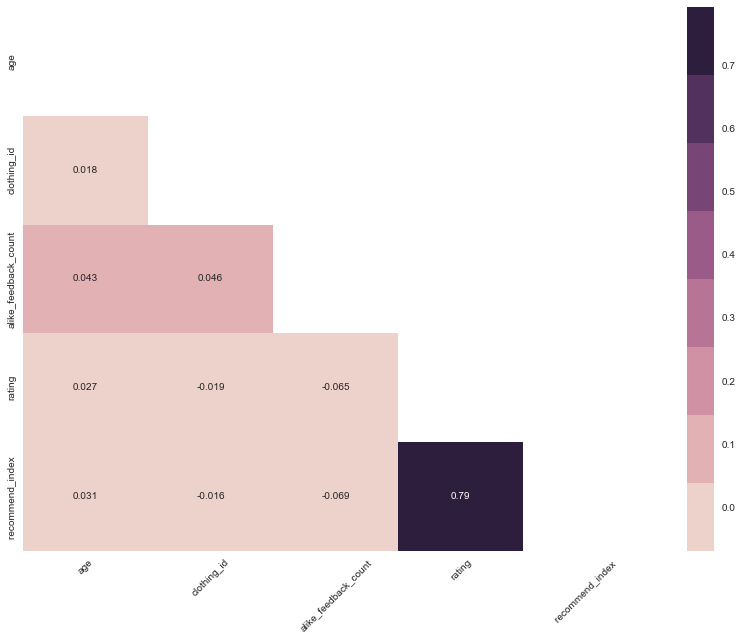

In [17]:
plt.figure(figsize=(14, 10))

# Getting the Upper Triangle of the co-relation matrix
matrix = np.triu(df.corr())

# using the upper triangle matrix as mask 
sns.heatmap(df.corr(), annot=True, cmap = sns.cubehelix_palette(8), mask=matrix)

plt.xticks(rotation=45);

#### 3.3 The Examination of Target Variable

In [22]:
df.columns

Index(['age', 'division_name', 'department_name', 'class_name', 'clothing_id',
       'title', 'review_text', 'alike_feedback_count', 'rating',
       'recommend_index '],
      dtype='object')

In [23]:
df["recommend_index "].value_counts()

1    19314
0     4172
Name: recommend_index , dtype: int64

In [24]:
df["recommend_index "].describe()

count   23486.00
mean        0.82
std         0.38
min         0.00
25%         1.00
50%         1.00
75%         1.00
max         1.00
Name: recommend_index , dtype: float64

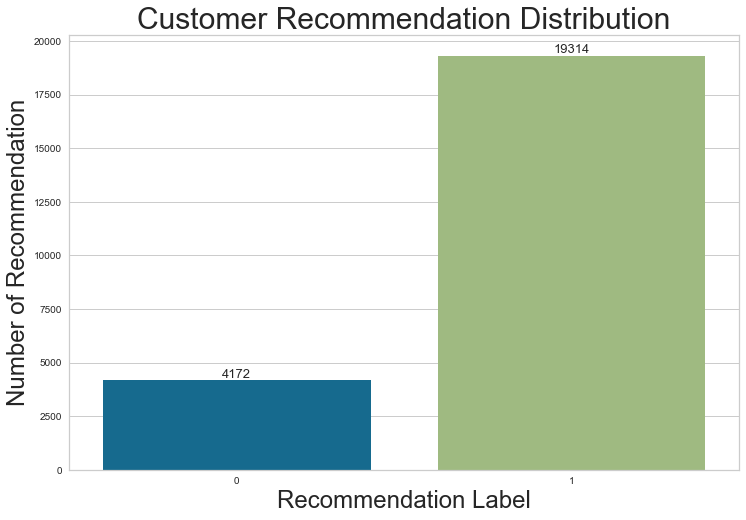

In [25]:
sns.countplot(df["recommend_index "])
plt.title("Customer Recommendation Distribution",fontsize = 30)
plt.xlabel("Recommendation Label",fontsize = 24)
plt.ylabel("Number of Recommendation",fontsize = 24)

for index,value in enumerate(df["recommend_index "].value_counts().sort_values()):
     plt.text(index, value, f"{value}", ha="center", va="bottom", fontsize = 13);

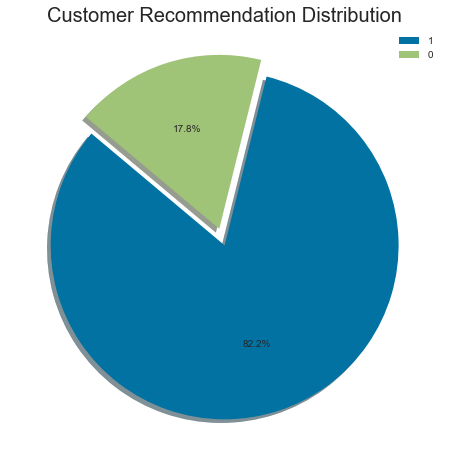

In [26]:
plt.figure(figsize=(8, 8))

explode = [0, 0.1]
plt.pie(df['recommend_index '].value_counts(), explode=explode, autopct='%1.1f%%', shadow=True, startangle=140)
plt.legend(labels=['1', '0'])
plt.title('Customer Recommendation Distribution', fontsize=20)
plt.axis('on');

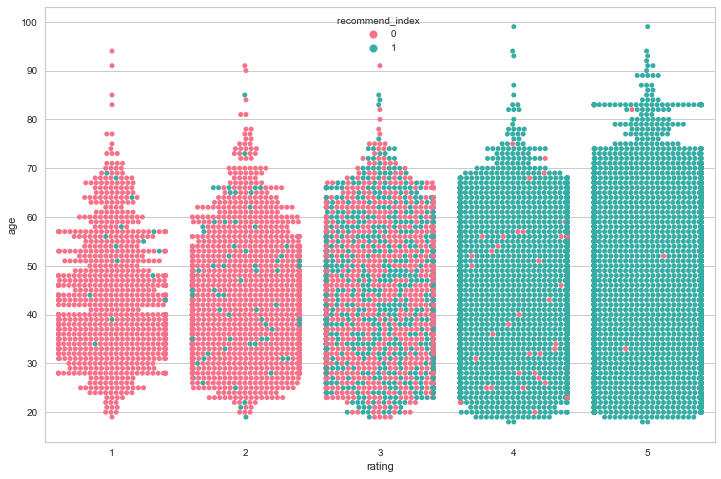

In [27]:
sns.swarmplot(y="age", x="rating", hue='recommend_index ', data=df, palette="husl");

In [ ]:
sns.swarmplot(y="age", x="division_name", hue='recommend_index ', data=df, palette="husl");

In [ ]:
sns.swarmplot(y="age", x="department_name", hue='recommend_index ', data=df, palette="husl");

In [ ]:
sns.swarmplot(y="age", x="class_name", hue='recommend_index ', data=df, palette="husl");

#### 3.4 The Examination of Other Features



###### In Rating
"rating" is a Positive Ordinal Integer variable for the product score granted by the customer from 1 Worst, to 5 Best.

In [ ]:
df["rating"].value_counts()

In [ ]:
df["rating"].describe().T

In [ ]:
sns.countplot(x = df.rating,data = df)
plt.title("Customer Rating Distribution", fontsize = 30)
plt.xlabel("Rating label",fontsize = 24)
plt.ylabel("The Number of Rating",fontsize = 24)

for index,value in enumerate(df.rating.value_counts().sort_values()):
    plt.text(index,value,f"{value}",ha = "center",va = "bottom",fontsize = 13)

In [ ]:
plt.figure(figsize=(8, 8))

explode = [0.1, 0, 0, 0, 0.1]
plt.pie(df['rating'].value_counts(), explode=explode, autopct='%1.1f%%', shadow=True, startangle=140)
plt.legend(labels=['1', '2', '3', '4','5'])
plt.title('Customer Rating Distribution', fontsize=20)
plt.axis('off');

###### In Age
age is a positive Integer variable of the reviewers age

In [36]:
df["age"].value_counts()

39    1269
35     909
36     842
34     804
38     780
37     766
41     741
33     725
46     713
42     651
32     631
48     626
40     617
44     617
43     579
31     569
47     564
53     560
45     529
29     513
49     490
56     471
52     442
28     428
26     423
30     407
50     398
54     395
51     393
57     363
27     344
60     341
62     338
25     331
55     328
59     321
58     277
66     276
64     247
23     247
24     245
63     239
61     227
65     226
67     157
22     146
68     141
69     113
20     108
21     102
70      93
71      51
74      50
72      46
83      43
19      40
73      40
75      26
77      18
78      15
79      15
82      13
80      10
76      10
84       6
85       6
89       5
91       5
81       5
87       4
18       4
94       3
90       2
93       2
86       2
99       2
92       1
Name: age, dtype: int64

In [37]:
df["age"].describe().T

count   23486.00
mean       43.20
std        12.28
min        18.00
25%        34.00
50%        41.00
75%        52.00
max        99.00
Name: age, dtype: float64

In [ ]:
plt.figure(figsize = (20, 8))
plt.title('Customer Age Distribution', fontsize=30)
plt.xlabel("Age", fontsize=24)
plt.ylabel("The Number of Customer Age", fontsize=18)

sns.histplot(df, x='age', kde = True, bins = 50);

In [ ]:
fig_dims = (32, 10)
fig, ax = plt.subplots(figsize=fig_dims)
sns.barplot(data = df, x = "age", y = "recommend_index ", ax=ax)

plt.title('Customer Age Distribution By Recommendations', fontsize=30)
plt.xlabel("Age", fontsize=24)
plt.ylabel("Customer Recommendation Ratio", fontsize=18)
plt.xticks(rotation = 45);

In [ ]:
fig = px.histogram(df['age'], color=df['recommend_index '],
                   labels={'value': 'Age', 'color': 'Recommended'}, 
                   color_discrete_map={0: "magenta", 1: "MediumPurple"},
                   marginal='box')
fig.update_traces(marker=dict(line=dict(color='#000000', width=2)))
fig.update_layout(title_text='Distribution of the Age and Recommendation',
                  title_x=0.5, title_font=dict(size=20))
fig.update_layout(barmode='overlay')
fig.show()

###### In alike_feedback_count
"alike_feedback_count" is Positive Integer documenting the number of other customers who found this review positive.



In [ ]:
df["alike_feedback_count"].value_counts()

In [ ]:
df["alike_feedback_count"].describe().T

In [ ]:
plt.figure(figsize = (20, 8))
plt.title('Customer Positive Feedback Distribution', fontsize=20)
plt.xlabel("Customer Positive Feedback", fontsize=24)
plt.ylabel("The Number of Customer Positive Feedback", fontsize=18)

sns.histplot(df, x='alike_feedback_count', kde = True, bins = 50);

In [ ]:
fig_dims = (30, 10)
fig, ax = plt.subplots(figsize=fig_dims)
sns.barplot(data = df, x = "alike_feedback_count", y = "age", ax=ax)

plt.xlabel("Customer Positive Feedback", fontsize=24)
plt.ylabel("Age", fontsize=24)

plt.title('Customer Positive Feedback Distribution By Age', fontsize=30)
plt.xticks(rotation = 45);

###### In Division_name 

"division_name" is Categorical name of the product high level division.

In [ ]:
df["division_name"].value_counts()

In [ ]:
df["division_name"].describe().T

In [ ]:
g = sns.catplot( x='division_name',
             kind="count", 
             data=df,
             height=5,
             aspect=2)

plt.title('Division Distribution', fontsize=24)
plt.xlabel("Division Name", fontsize=24)
plt.ylabel("The Number of Divisions", fontsize=20)

ax = g.facet_axis(0, 0)
for p in ax.patches:
    ax.text(p.get_x() + 0.28, 
            p.get_height() * 1.025, 
            '{0:.0f}'.format(p.get_height()), 
            color='black', rotation='horizontal', size='large')

plt.show()

In [ ]:
plt.figure(figsize=(8, 8))

explode = [0.1, 0.1, 0]
plt.pie(df['division_name'].value_counts(), explode=explode, autopct='%1.1f%%', shadow=True, startangle=140)
plt.legend(labels=['1', '2', '3'])
plt.title('Division Distribution', fontsize=20)
plt.axis('off');

In [ ]:
g = sns.catplot(data = df, x ="division_name", hue = "recommend_index ", kind='count', height=5, aspect=2, legend_out=False)

plt.title('Division Distribution By Recommendation', fontsize=24)
plt.xlabel("Division Name By Recommendation", fontsize=20)
plt.ylabel("The Number of Divisions", fontsize=20)
plt.legend(title='Recommendation Indicator', loc='upper left', labels=['Not Recomnended', 'Recomnended'])

ax = g.facet_axis(0, 0)
for p in ax.patches:
    ax.text(p.get_x() + 0.12, 
            p.get_height() * 1.025, 
            '{0:.0f}'.format(p.get_height()), 
            color='black', rotation='horizontal', size='large')

plt.show()

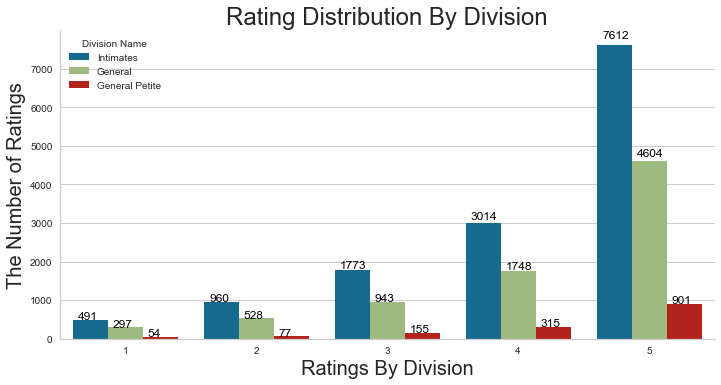

In [38]:
g = sns.catplot(data = df, x ="rating", hue = "division_name", kind='count', height=5, aspect=2, legend_out=False)

plt.title('Rating Distribution By Division', fontsize=24)
plt.xlabel("Ratings By Division", fontsize=20)
plt.ylabel("The Number of Ratings", fontsize=20)
plt.legend(title='Division Name', loc='upper left', labels=['Intimates', 'General', 'General Petite'])

ax = g.facet_axis(0, 0)
for p in ax.patches:
    ax.text(p.get_x() + 0.04, 
            p.get_height() * 1.025, 
            '{0:.0f}'.format(p.get_height()), 
            color='black', rotation='horizontal', size='large')

plt.show()

###### In department_name

"department_name" is a Categorical variable of the product department name.

In [40]:
df["department_name"].value_counts()

Tops        10468
Dresses      6319
Bottoms      3799
Intimate     1735
Jackets      1032
Trend         119
Name: department_name, dtype: int64

In [41]:
df["department_name"].describe().T

count     23472
unique        6
top        Tops
freq      10468
Name: department_name, dtype: object

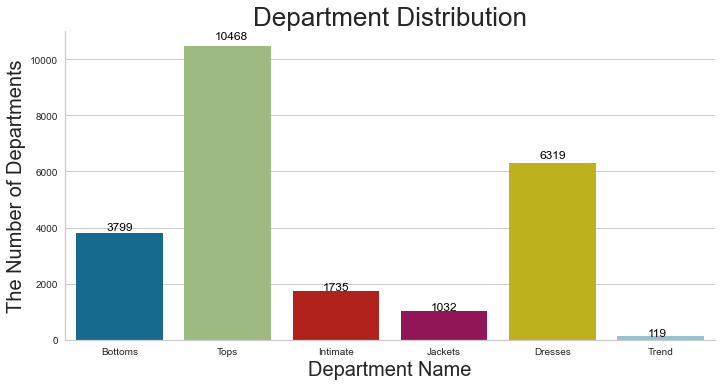

In [42]:
g = sns.catplot(data = df, x ="department_name", kind='count', height=5, aspect=2)

plt.title('Department Distribution', fontsize=26)
plt.xlabel("Department Name", fontsize=20)
plt.ylabel("The Number of Departments", fontsize=20)

ax = g.facet_axis(0, 0)
for p in ax.patches:
    ax.text(p.get_x() + 0.28, 
            p.get_height() * 1.025, 
            '{0:.0f}'.format(p.get_height()), 
            color='black', rotation='horizontal', size='large')

plt.show()

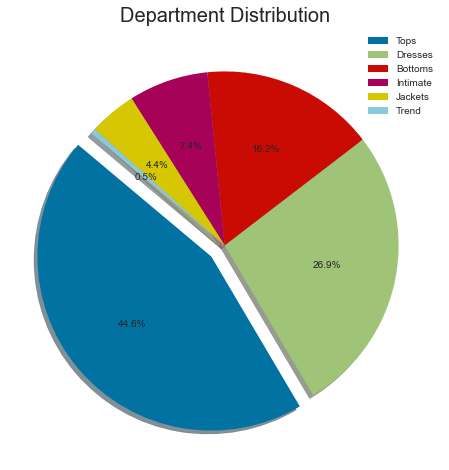

In [43]:

plt.figure(figsize=(8, 8))

explode = [0.1, 0, 0, 0, 0, 0]
plt.pie(df['department_name'].value_counts(), explode=explode, autopct='%1.1f%%', shadow=True, startangle=140)
plt.legend(labels=['Tops', 'Dresses', 'Bottoms', 'Intimate', 'Jackets', 'Trend'])
plt.title('Department Distribution', fontsize=20)
plt.axis('off');

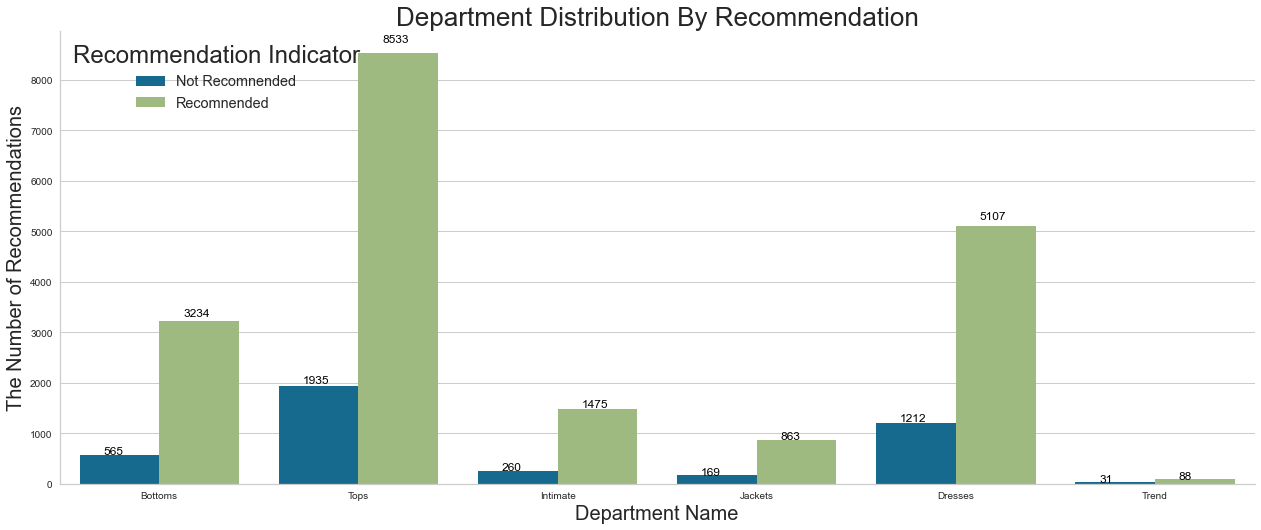

In [44]:
g = sns.catplot(data = df, x ="department_name", hue = "recommend_index ", kind='count', height=7, aspect=2.5, legend_out=False)

plt.title('Department Distribution By Recommendation', fontsize=26)
plt.xlabel("Department Name", fontsize=20)
plt.ylabel("The Number of Recommendations", fontsize=20)
plt.legend(title='Recommendation Indicator', loc='upper left', labels=['Not Recomnended', 'Recomnended'], fontsize='x-large', title_fontsize='24')

ax = g.facet_axis(0, 0)
for p in ax.patches:
    ax.text(p.get_x() + 0.12, 
            p.get_height() * 1.025, 
            '{0:.0f}'.format(p.get_height()), 
            color='black', rotation='horizontal', size='large')

plt.show()

<Figure size 1080x576 with 0 Axes>

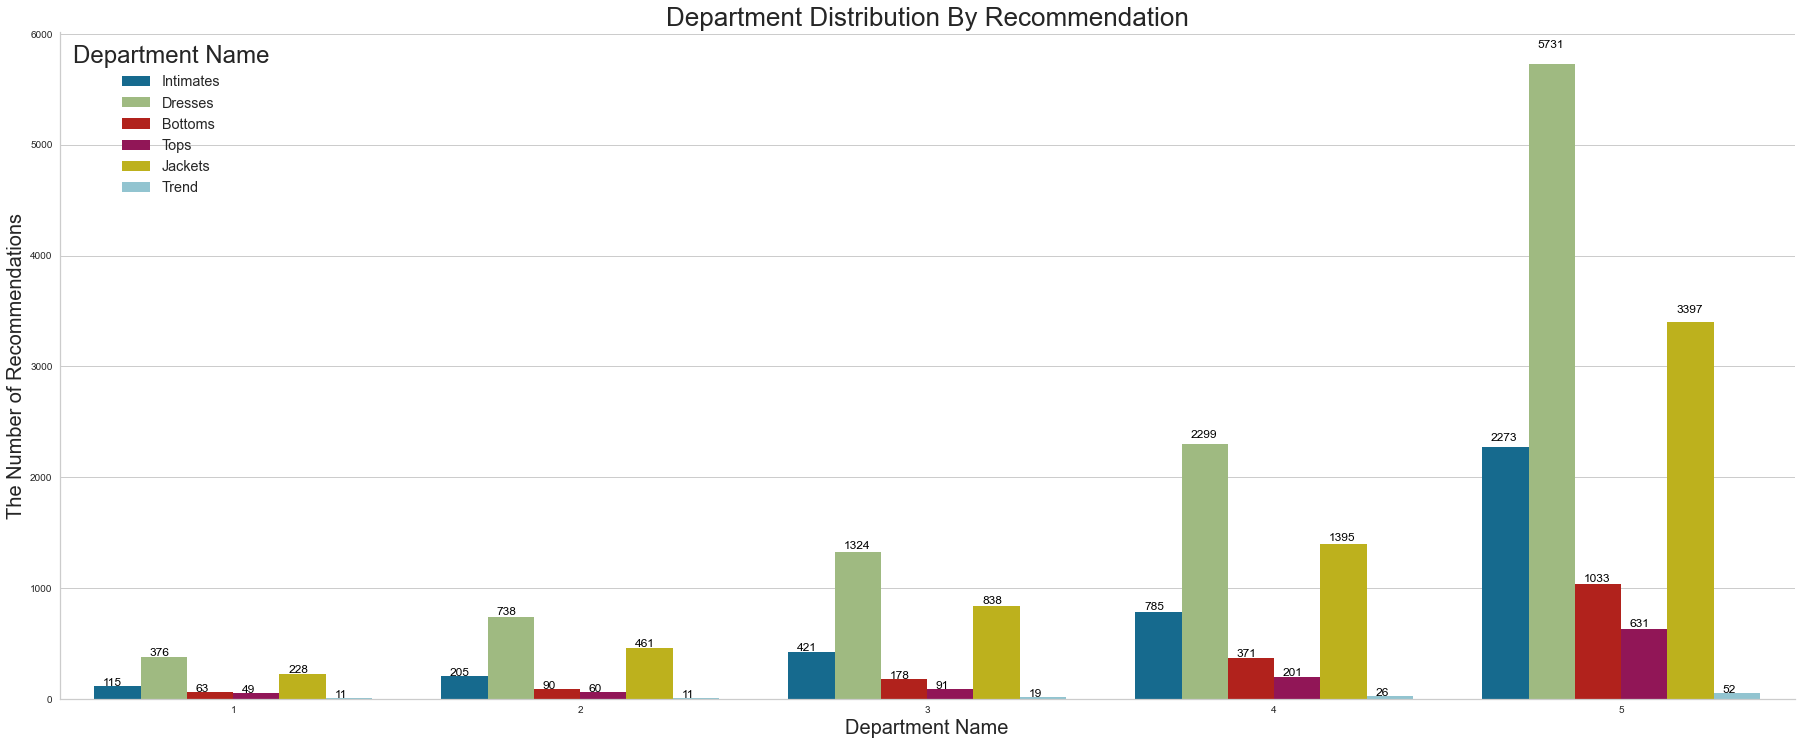

In [45]:
g = sns.catplot(data = df, x ="rating", hue = "department_name", kind='count', height=10, aspect=2.5, legend_out=False)

plt.title('Department Distribution By Recommendation', fontsize=26)
plt.xlabel("Department Name", fontsize=20)
plt.ylabel("The Number of Recommendations", fontsize=20)
plt.legend(title='Department Name', loc='upper left', labels=['Intimates', 'Dresses', 'Bottoms', 'Tops', 'Jackets', 'Trend'], fontsize='x-large', title_fontsize='24')
plt.figure(figsize=(15, 8))

ax = g.facet_axis(0, 0)
for p in ax.patches:
    ax.text(p.get_x() + 0.025, 
            p.get_height() * 1.025, 
            '{0:.0f}'.format(p.get_height()), 
            color='black', rotation='horizontal', size='large')

plt.show()

###### In class_name

"class_name" is a Categorical variable of the product class name.

In [46]:
df["class_name"].value_counts()

Dresses           6319
Knits             4843
Blouses           3097
Sweaters          1428
Pants             1388
Jeans             1147
Fine gauge        1100
Skirts             945
Jackets            704
Lounge             691
Swim               350
Outerwear          328
Shorts             317
Sleep              228
Legwear            165
Intimates          154
Layering           146
Trend              119
Casual bottoms       2
Chemises             1
Name: class_name, dtype: int64

In [47]:
df["class_name"].describe().T

count       23472
unique         20
top       Dresses
freq         6319
Name: class_name, dtype: object

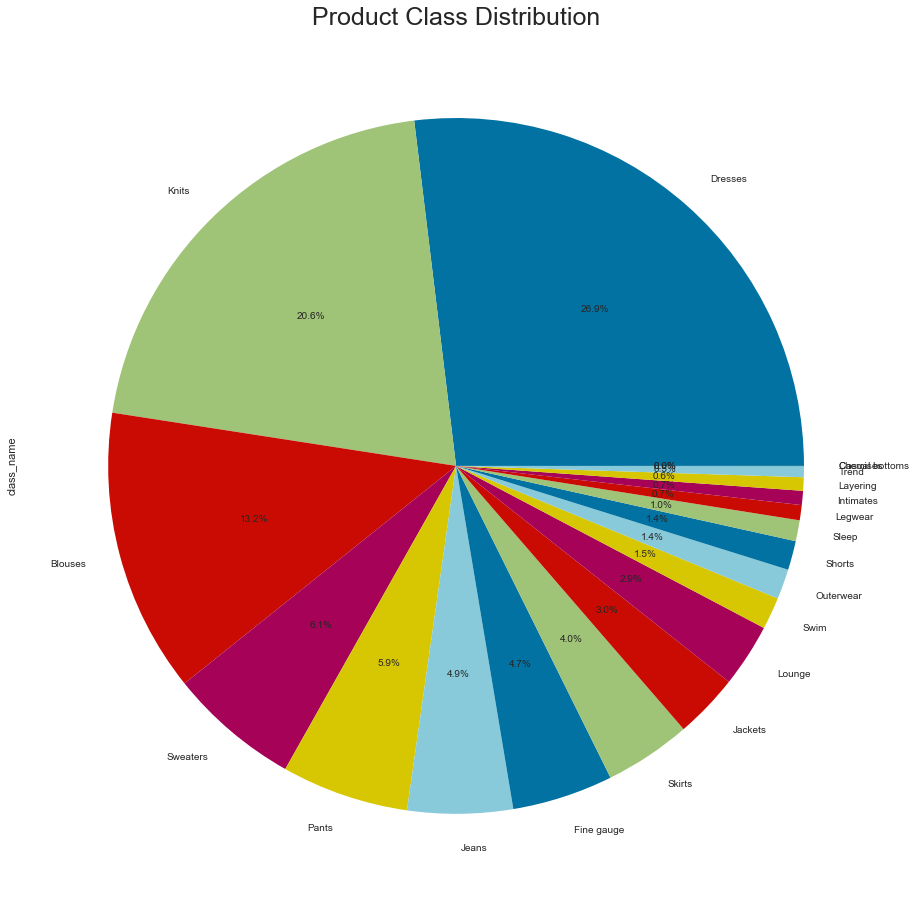

In [48]:
plt.title('Product Class Distribution', fontsize=25)
df["class_name"].value_counts().plot(kind="pie", autopct='%1.1f%%', figsize=(16, 16));

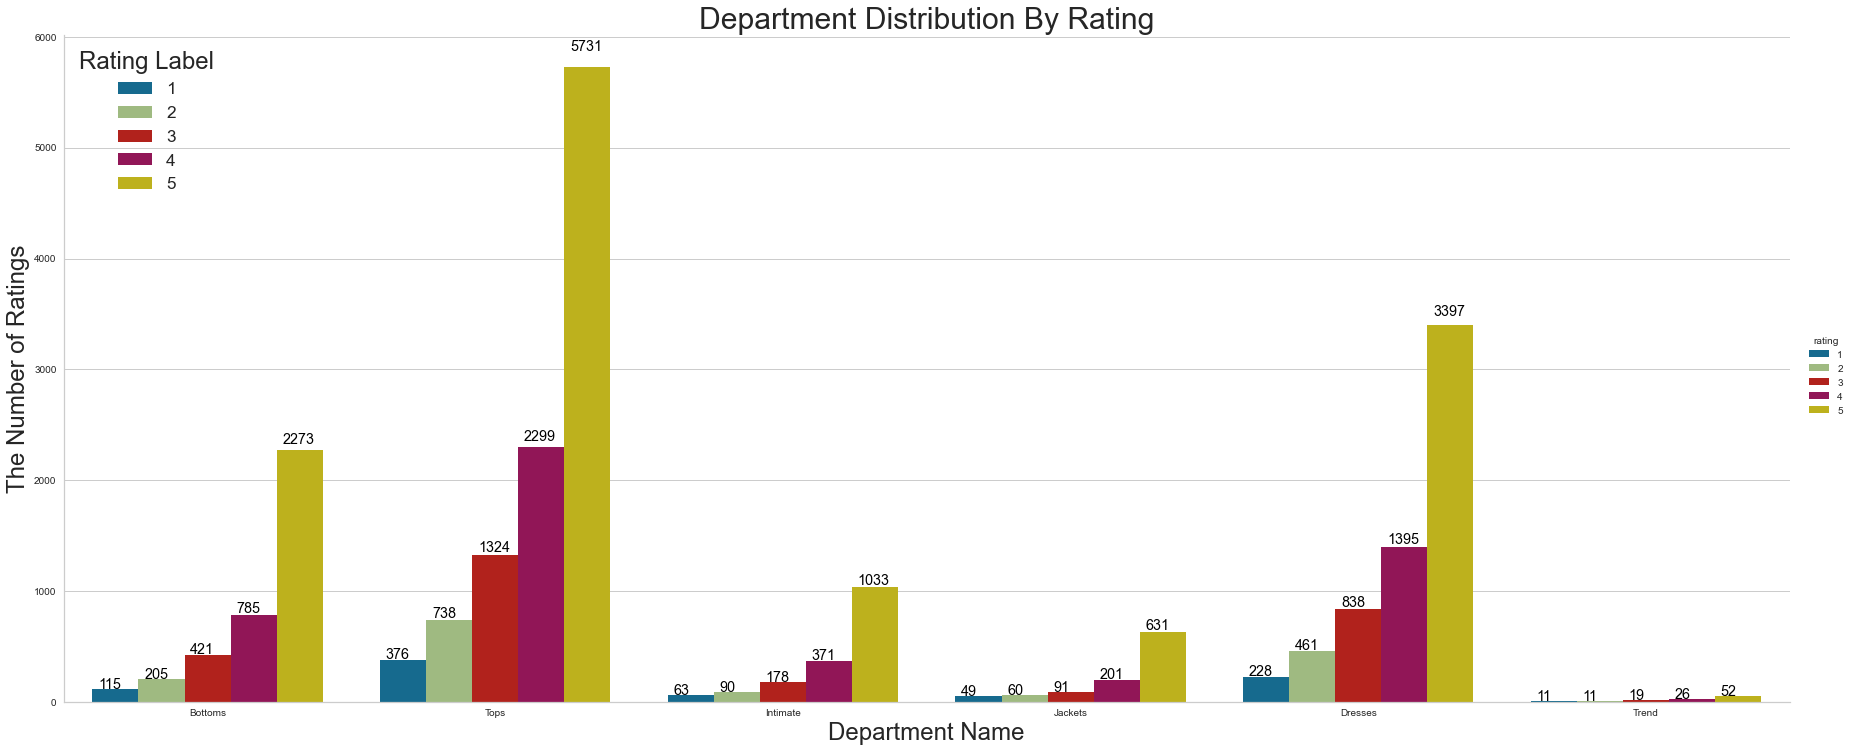

In [49]:
g = sns.catplot(data = df, x ="department_name", hue = "rating", kind='count', height=10, aspect=2.5)

sns.set(rc = {'figure.figsize':(32, 14)})
plt.title('Department Distribution By Rating', fontsize=30)
plt.xlabel("Department Name", fontsize=24)
plt.ylabel("The Number of Ratings", fontsize=24)
plt.legend(title='Rating Label', loc='upper left', labels=['1', '2', '3', '4', '5'], fontsize='x-large', title_fontsize='24')

ax = g.facet_axis(0, 0)
for p in ax.patches:
    ax.text(p.get_x() + 0.02, 
            p.get_height() * 1.025, 
            '{0:.0f}'.format(p.get_height()), 
            color='black', rotation='horizontal', size='large')

plt.show()

In [50]:
FreqOfWords = df['review_text'].str.split(expand=True).stack().value_counts()
FreqOfWords_top200 = FreqOfWords[:200]

fig = px.treemap(FreqOfWords_top200, path=[FreqOfWords_top200.index], values=0, width=1000, height=600)
fig.update_layout(title_text='Top Frequent 200 Words in the Dataset (Before Cleaning)',
                  title_x=0.5, title_font=dict(size=20)
                  )
fig.update_traces(textinfo="label+value")
fig.show()

In [51]:
df_cat = df[['division_name', 'department_name', 'class_name', "recommend_index "]]
df_cat["recommend_index "] = df_cat["recommend_index "].apply(lambda x: "Recommended" if x>=1 else "Not Recommended")
df_cat.rename({'division_name': 'Division Name', 'department_name': 'Department Name', 'class_name': 'Class Name', 'recommend_index ': 'Recommendation Indicator'}, axis=1, inplace=True)
df_cat

Division Name Department Name Class Name Recommendation Indicator
0             General         Bottoms      Jeans              Recommended
1      General Petite            Tops    Blouses              Recommended
2      General Petite         Bottoms     Skirts          Not Recommended
3      General Petite         Bottoms      Pants              Recommended
4           Initmates        Intimate       Swim              Recommended
...               ...             ...        ...                      ...
23481  General Petite         Dresses    Dresses              Recommended
23482         General         Dresses    Dresses              Recommended
23483  General Petite            Tops      Knits              Recommended
23484         General         Dresses    Dresses              Recommended
23485         General         Jackets    Jackets              Recommended

[23486 rows x 4 columns]

In [52]:
df_num = df[['age', 'rating', 'alike_feedback_count', 'recommend_index ']]
df_num["recommend_index "] = df_num["recommend_index "].apply(lambda x: "Recommended" if x>=1 else "Not Recommended")
df_num.rename({'age': 'Age', 'rating': 'Rating', 'alike_feedback_count': 'Positive Feedback', 'recommended_ind': 'Recommendation Indicator'}, axis=1, inplace=True)
df_num

Age  Rating  Positive Feedback recommend_index 
0       40       5                  0      Recommended
1       62       5                 12      Recommended
2       47       1                  3  Not Recommended
3       45       5                  0      Recommended
4       37       5                  0      Recommended
...    ...     ...                ...              ...
23481   44       5                  0      Recommended
23482   39       5                  1      Recommended
23483   29       5                  0      Recommended
23484   57       5                 10      Recommended
23485   56       5                  0      Recommended

[23486 rows x 4 columns]

In [53]:
for i, col in enumerate(df_cat.columns):
    xtab = pd.crosstab(df_cat[col], df_cat["Recommendation Indicator"], normalize=True)
    print(colored('-'*55, 'red', attrs=['bold']), sep='')
    print(xtab*100)

-------------------------------------------------------
Recommendation Indicator  Not Recommended  Recommended
Division Name                                         
General                             10.81        48.20
General Petite                       6.02        28.57
Initmates                            0.95         5.45
-------------------------------------------------------
Recommendation Indicator  Not Recommended  Recommended
Department Name                                       
Bottoms                              2.41        13.78
Dresses                              5.16        21.76
Intimate                             1.11         6.28
Jackets                              0.72         3.68
Tops                                 8.24        36.35
Trend                                0.13         0.37
-------------------------------------------------------
Recommendation Indicator  Not Recommended  Recommended
Class Name                                            
Blouses

In [54]:
df_num.columns

Index(['Age', 'Rating', 'Positive Feedback', 'recommend_index '], dtype='object')

In [55]:
for i, col in enumerate(df_num.columns):
    xtab = pd.crosstab(df_num[col], df_num['recommend_index '], normalize=True)
    print(colored('-'*55, 'red', attrs=['bold']), sep='')
    print(xtab*100)

-------------------------------------------------------
recommend_index   Not Recommended  Recommended
Age                                           
18                           0.00         0.02
19                           0.02         0.15
20                           0.06         0.40
21                           0.04         0.40
22                           0.06         0.56
23                           0.16         0.89
24                           0.17         0.87
25                           0.27         1.14
26                           0.33         1.47
27                           0.25         1.21
28                           0.44         1.38
29                           0.48         1.71
30                           0.36         1.37
31                           0.52         1.90
32                           0.45         2.24
33                           0.69         2.40
34                           0.61         2.81
35                           0.79         3.08
36  

## 4 Feature Selection

#### 4.1 Droping unwanted Feature

In [176]:
df.columns

Index(['review_text', 'recommend_index '], dtype='object')

In [58]:
df.drop(['clothing_id', 'age', 'title', 'rating',
       'alike_feedback_count', 'division_name',
       'department_name', 'class_name'], axis=1, inplace=True)

In [59]:
df.head(3)

review_text  \
0  Like other reviewers i was hesitant to spend this much on a pair of jeans. however, i purchased them at  20% off on retailer day and...honestly...they look so good i probably would have paid full ...   
1  As is true of a bunch of the fall clothing photos, the colors are totally washed out in these model images which is such a shame. the embroidery is bright and vivid and totally unique on this! the...   
2                                   I so wanted this skirt to work, love the design! but, it's way, way too long... i am 5, 5, 116lb, and the small is 1 inch on the floor. i step on the skirt as i walk.   

   recommend_index   
0                 1  
1                 1  
2                 0

#### 4.2 Detecting & Handling of  Missing Value

In [60]:
df["review_text"].isnull().value_counts()

False    22641
True       845
Name: review_text, dtype: int64

In [61]:
df["recommend_index "].isnull().value_counts()

False    23486
Name: recommend_index , dtype: int64

In [62]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 23486 entries, 0 to 23485
Data columns (total 2 columns):
 #   Column            Non-Null Count  Dtype 
---  ------            --------------  ----- 
 0   review_text       22641 non-null  object
 1   recommend_index   23486 non-null  int64 
dtypes: int64(1), object(1)
memory usage: 367.1+ KB


In [63]:
df = df.dropna()

In [64]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 22641 entries, 0 to 23485
Data columns (total 2 columns):
 #   Column            Non-Null Count  Dtype 
---  ------            --------------  ----- 
 0   review_text       22641 non-null  object
 1   recommend_index   22641 non-null  int64 
dtypes: int64(1), object(1)
memory usage: 530.6+ KB


In [65]:
df["review_text"].isnull().value_counts()

False    22641
Name: review_text, dtype: int64

In [66]:
df["recommend_index "].isnull().value_counts()

False    22641
Name: recommend_index , dtype: int64

In [67]:
missing_values(df)

Empty DataFrame
Columns: [Missing_Number, Missing_Percent]
Index: []

In [ ]:
#Sometimes we cannot detect missing values if they consist of empty 
(blank) string such as " ". In this situation we can use the following 
syntax.

In [68]:
blanks = []  # start with an empty list

for rv in df.itertuples(): # iterate over the DataFrame
    if type(rv)==str and rv.isspace(): # avoid NaN values and test 'review' for whitespace
        blanks.append(i)
blanks

[]

In [69]:
df["review_text"].str.isspace().sum()

0

In [70]:
df[df["review_text"].str.isspace() == True].index

Int64Index([], dtype='int64')

## 5 TEXT MINING
Text is the most unstructured form of all the available data, therefore various types of noise are present in it. This
means that the data is not readily analyzable without any pre-processing. The entire process of cleaning and standardization
of text, making it noise-free and ready for analysis is known as text preprocessing.

The three key steps of text preprocessing:

Tokenization: This step is one of the top priorities when it comes to working on text mining. Tokenization is essentially 
splitting a phrase, sentence, paragraph, or an entire text document into smaller units, such as individual words or terms. 
Each of these smaller units are called tokens.

Noise Removal: Any piece of text which is not relevant to the context of the data and the end-output can be specified as 
the noise. For example – language stopwords (commonly used words of a language – is, am, the, of, in etc), URLs or links, 
upper and lower case differentiation, punctuations and industry specific words. This step deals with removal of all types 
of noisy entities present in the text.

Lexicon Normalization: Another type of textual noise is about the multiple representations exhibited by single word. 
For example – “play”, “player”, “played”, “plays” and “playing” are the different variations of the word – “play”. Though t
hey mean different things, contextually they all are similar. This step converts all the disparities of a word into their 
normalized form (also known as lemma). There are two methods of lexicon normalisation; Stemming or Lemmatization.
Lemmatization is recommended for this case, because Lemmatization as this will return the root form of each word 
(rather than just stripping suffixes, which is stemming). As the first step change text to tokens and convertion all of 
the words to lower case. Next remove punctuation, bad characters, numbers and stop words. The second step is aimed to 
normalization them throught the Lemmatization method.

### 5.1 Tokenization, Noise Removal & Normalization

we can use one of the following user defined function for tokenization,Noise Removeal and Lexicon Normalization.Both do the same job.We prefered to implement the first one. 

In [74]:
# we make a define funtion for Removing Puncuation,number,Stopword and also tokenize it
def clean_up(data):
    
    import re
    #1. remove Puncuation 
    text = re.sub("[^\w\s]","",data)
    
    #2. TOkenize
    text_tokens = word_tokenize(text.lower())
    
    #3.remove Number
    tokens_without_punc = [w for w in text_tokens if w.isalpha()]
    
    #4 Removing Stopords
    tokens_without_sw = [t for t in tokens_without_punc if t not in stop_word]
    
    #5 lemma
    text_cleaned = [WordNetLemmatizer().lemmatize(t) for t in tokens_without_sw]
    
    # joining
    return " ".join(text_cleaned)

In [75]:
stop_word = stopwords.words("english")

In [76]:
text = clean_up(str(df["review_text"]))
text

'like reviewer hesitant spend much pair jean however purchased retailer day andhonestlythey look good probably would paid full true bunch fall clothing photo color totally washed model image shame embroidery bright vivid totally unique wanted skirt work love design way way long small inch floor step skirt walk love love hesitant buy first review made seem big wasnt sure kind outfit wanted try jumpsuit perfect find absolutely love retro look swimsuit first saw blogger amber fillerupclark barefoot blonde knew first one piece suit ive purchased oot dress blue fit greathits knee short awkwardly long wish short sleeve could wear one summer beautiful easy patient dress waiting almost forever till dress get sale tried usual size way tight could zip lb dres deep v doesnt gape flatters neckline waisthigh side slit reveal enough keep drapey shirt looking shapeless material lovely soft comfy bu saw dress online morning went store afternoon walked love brand design modest feminine practical dress 

In [77]:
df["review_text"] = df["review_text"].apply(clean_up)
df["review_text"].head()

0                                                             like reviewer hesitant spend much pair jean however purchased retailer day andhonestlythey look good probably would paid full price jean fresh
1    true bunch fall clothing photo color totally washed model image shame embroidery bright vivid totally unique bib area actually soft corduroy think nice transition fall winter term fit feel like ma...
2                                                                                                                                wanted skirt work love design way way long small inch floor step skirt walk
3    love love hesitant buy first review made seem big wasnt sure kind outfit wanted try jumpsuit perfect find x typical retailer size size good color fabulous fit great rise slightly short problem can...
4    absolutely love retro look swimsuit first saw blogger amber fillerupclark barefoot blonde knew first one piece suit ive purchased six year ive avoided one piece one tried made

### 5.2 Handling with Rare Words

In [78]:
" ".join(df["review_text"]).split()

['like',
 'reviewer',
 'hesitant',
 'spend',
 'much',
 'pair',
 'jean',
 'however',
 'purchased',
 'retailer',
 'day',
 'andhonestlythey',
 'look',
 'good',
 'probably',
 'would',
 'paid',
 'full',
 'price',
 'jean',
 'fresh',
 'true',
 'bunch',
 'fall',
 'clothing',
 'photo',
 'color',
 'totally',
 'washed',
 'model',
 'image',
 'shame',
 'embroidery',
 'bright',
 'vivid',
 'totally',
 'unique',
 'bib',
 'area',
 'actually',
 'soft',
 'corduroy',
 'think',
 'nice',
 'transition',
 'fall',
 'winter',
 'term',
 'fit',
 'feel',
 'like',
 'maybe',
 'geared',
 'towards',
 'slender',
 'build',
 'slim',
 'cut',
 'found',
 'really',
 'flattering',
 'since',
 'sometimes',
 'swim',
 'tunic',
 'small',
 'wanted',
 'skirt',
 'work',
 'love',
 'design',
 'way',
 'way',
 'long',
 'small',
 'inch',
 'floor',
 'step',
 'skirt',
 'walk',
 'love',
 'love',
 'hesitant',
 'buy',
 'first',
 'review',
 'made',
 'seem',
 'big',
 'wasnt',
 'sure',
 'kind',
 'outfit',
 'wanted',
 'try',
 'jumpsuit',
 'perfect

In [80]:
word_values = pd.Series(" ".join(df["review_text"]).split()).value_counts()
word_values

dress         11319
fit           10091
size           9349
love           8968
top            8256
              ...  
saleunless        1
scattered         1
coin              1
fountain          1
sunnies           1
Length: 16758, dtype: int64

In [83]:
word_values[:10]

dress    11319
fit      10091
size      9349
love      8968
top       8256
like      7018
color     6903
look      6873
wear      6512
great     6076
dtype: int64

In [84]:
rare_words = word_values[word_values <= 2]
rare_words

dreamed       2
ontaking      2
jutted        2
repellent     2
personi       2
             ..
saleunless    1
scattered     1
coin          1
fountain      1
sunnies       1
Length: 10935, dtype: int64

In [89]:
rare_words.value_counts()

1    9058
2    1877
dtype: int64

In [90]:
len(rare_words)

10935

In [91]:
rare_words.index

Index(['dreamed', 'ontaking', 'jutted', 'repellent', 'personi', 'charisma',
       'boyleg', 'paler', 'shld', 'cigarette',
       ...
       'bellshaped', 'underneathat', 'procrastinate', 'waistcoat',
       'workinappropriate', 'saleunless', 'scattered', 'coin', 'fountain',
       'sunnies'],
      dtype='object', length=10935)

In [ ]:
df["review_text"] = df["review_text"].apply(lambda x: " ".join([i for i in x.split() if i not in rare_words.index]))
df["review_text"].head()

In [ ]:
df.info()

In [ ]:
df.head(3)

## 6.WORDCLOUD - REPETITON OF WORDS
Now we'll create a Word Clouds for reviews, representing most common words in each target class.

Word Cloud is a data visualization technique used for representing text 
data in which the size of each word indicates its frequency or importance.
Significant textual data points can be highlighted using a word cloud.

We are expected to create separate word clouds for positive and negative reviews. As such we can qualify a review as positive or negative, by looking at its recommended status.

We can follow the steps below:

Detect Reviews Collect Words Create Word Cloud

### 6.1 The Detection of Positive And Negative Reviews

In [92]:
df.columns

Index(['review_text', 'recommend_index '], dtype='object')

In [93]:
df[df["recommend_index "]== 0]

review_text  \
2                                                                                                                                  wanted skirt work love design way way long small inch floor step skirt walk   
13     really loved skirt model wasnt flattering received order ordered two size athletic build front closure made waist look much larger back skirt also flared expected sadly return perhaps would look b...   
15     jean size dress fell love pattern particular knowing design might work best body ordered size small unflattering nothing body type anything excess fabric made appear wider made waist nonexistent t...   
16     love idea coat foolishly purchased item happy anticipation arrival description say lined hoped soft wool recently got yellow white piping sweater coat hard coarse itchy wool impossible wear unline...   
26     tried store fit like tent doesnt help im store didnt petite size maybe teller person would work better maybe able try petite size would wearable comfy style natural fiber plus another holding hors...   
...                                                                                                                                                                                                        ...   
23447                                                                                            love top beading beautiful like everyone else way large normally wear lg large look feel like beautiful large   
23461  seeing dress online noticing quickly sold curious thought luck happened ran store one returned size tried wasnt sold however loved color snug across shoulder arm rest somewhat flowy boxy time ende...   
23471  adored suit style color thick quality fabricbut unfortunately bottom seam cut groin backside much practically painful im lb usually wear size small advised size even medium tried everything fit we...   
23478  feel soft like good quality however really run large long looking loose tank one almost tunic short height even cardigan give shape didnt work also thought would shrink dryer didnt also wrinkle ea...   
23480  agree first reviewer really loved color dress could almost overlooked lack lining felt fabric expecting nice lush silk instead getting felt like polyster instead couldnt justify price really liked...   

       recommend_index   
2                     0  
13                    0  
15                    0  
16                    0  
26                    0  
...                 ...  
23447                 0  
23461                 0  
23471                 0  
23478                 0  
23480                 0  

[4101 rows x 2 columns]

In [94]:
df[df["recommend_index "]== 1]

review_text  \
0                                                               like reviewer hesitant spend much pair jean however purchased retailer day andhonestlythey look good probably would paid full price jean fresh   
1      true bunch fall clothing photo color totally washed model image shame embroidery bright vivid totally unique bib area actually soft corduroy think nice transition fall winter term fit feel like ma...   
3      love love hesitant buy first review made seem big wasnt sure kind outfit wanted try jumpsuit perfect find x typical retailer size size good color fabulous fit great rise slightly short problem can...   
4      absolutely love retro look swimsuit first saw blogger amber fillerupclark barefoot blonde knew first one piece suit ive purchased six year ive avoided one piece one tried made feel frumpy monokini...   
5      love sweater im fence keeping havent figured way layer wear really appear best plain white top jean ive tried several thing closet havent found another combination sell really like piece versatile...   
...                                                                                                                                                                                                        ...   
23481                                                                              oot dress blue fit greathits knee short awkwardly long wish short sleeve could wear one summer beautiful easy wear work fun   
23482  patient dress waiting almost forever till dress get sale tried usual size way tight could zip lb dress cover knee perfect length sit show much length work friendly side pocket comfortable well cut...   
23483  deep v doesnt gape flatters neckline waisthigh side slit reveal enough keep drapey shirt looking shapeless material lovely soft comfy cling right place really flatter problem area get draped perfe...   
23484  saw dress online morning went store afternoon walked love brand design modest feminine practical dress made thicker study cotton beautiful embroidery fit tt adjust waist fit loose bit snug length ...   
23485                                                                                                                                                         super cute jacket perfect fall cant stop wearing   

       recommend_index   
0                     1  
1                     1  
3                     1  
4                     1  
5                     1  
...                 ...  
23481                 1  
23482                 1  
23483                 1  
23484                 1  
23485                 1  

[18540 rows x 2 columns]

In [95]:
df["recommend_index "].value_counts()

1    18540
0     4101
Name: recommend_index , dtype: int64

### 6.2 The Collection of Positive and Negative Words

In [97]:
pos_words = " ".join(df[df["recommend_index "]==1].review_text).split()
pos_words

['like',
 'reviewer',
 'hesitant',
 'spend',
 'much',
 'pair',
 'jean',
 'however',
 'purchased',
 'retailer',
 'day',
 'andhonestlythey',
 'look',
 'good',
 'probably',
 'would',
 'paid',
 'full',
 'price',
 'jean',
 'fresh',
 'true',
 'bunch',
 'fall',
 'clothing',
 'photo',
 'color',
 'totally',
 'washed',
 'model',
 'image',
 'shame',
 'embroidery',
 'bright',
 'vivid',
 'totally',
 'unique',
 'bib',
 'area',
 'actually',
 'soft',
 'corduroy',
 'think',
 'nice',
 'transition',
 'fall',
 'winter',
 'term',
 'fit',
 'feel',
 'like',
 'maybe',
 'geared',
 'towards',
 'slender',
 'build',
 'slim',
 'cut',
 'found',
 'really',
 'flattering',
 'since',
 'sometimes',
 'swim',
 'tunic',
 'small',
 'love',
 'love',
 'hesitant',
 'buy',
 'first',
 'review',
 'made',
 'seem',
 'big',
 'wasnt',
 'sure',
 'kind',
 'outfit',
 'wanted',
 'try',
 'jumpsuit',
 'perfect',
 'find',
 'x',
 'typical',
 'retailer',
 'size',
 'size',
 'good',
 'color',
 'fabulous',
 'fit',
 'great',
 'rise',
 'slightly',

In [98]:
neg_words = " ".join(df[df["recommend_index "]==0].review_text).split()
neg_words

['wanted',
 'skirt',
 'work',
 'love',
 'design',
 'way',
 'way',
 'long',
 'small',
 'inch',
 'floor',
 'step',
 'skirt',
 'walk',
 'really',
 'loved',
 'skirt',
 'model',
 'wasnt',
 'flattering',
 'received',
 'order',
 'ordered',
 'two',
 'size',
 'athletic',
 'build',
 'front',
 'closure',
 'made',
 'waist',
 'look',
 'much',
 'larger',
 'back',
 'skirt',
 'also',
 'flared',
 'expected',
 'sadly',
 'return',
 'perhaps',
 'would',
 'look',
 'better',
 'someone',
 'much',
 'taller',
 'frame',
 'jean',
 'size',
 'dress',
 'fell',
 'love',
 'pattern',
 'particular',
 'knowing',
 'design',
 'might',
 'work',
 'best',
 'body',
 'ordered',
 'size',
 'small',
 'unflattering',
 'nothing',
 'body',
 'type',
 'anything',
 'excess',
 'fabric',
 'made',
 'appear',
 'wider',
 'made',
 'waist',
 'nonexistent',
 'trouble',
 'skirt',
 'portion',
 'elastic',
 'band',
 'starting',
 'high',
 'approximately',
 'right',
 'chest',
 'almost',
 'like',
 'empire',
 'waist',
 'hidden',
 'flap',
 'material',


### 6.3 Creating of Word Cloud

##### 6.3.1 WordCloud - For positive review words

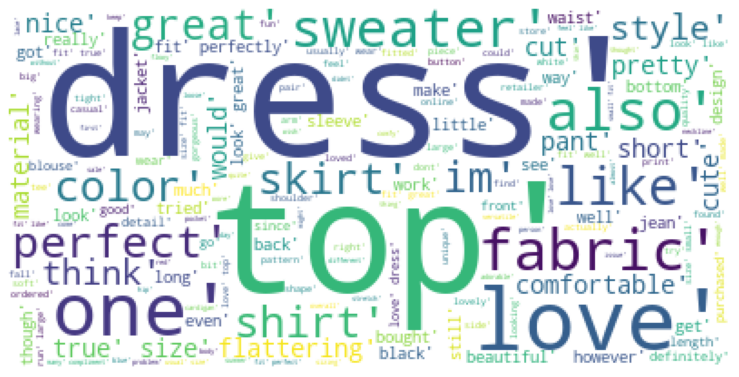

In [102]:
wordcloud = WordCloud(background_color="white", max_words =250).generate(str(pos_words))

plt.figure(figsize = (13, 13))
plt.imshow(wordcloud)
plt.axis("off")
plt.show()


###### 6.3.2 wordcloud - For negative review 

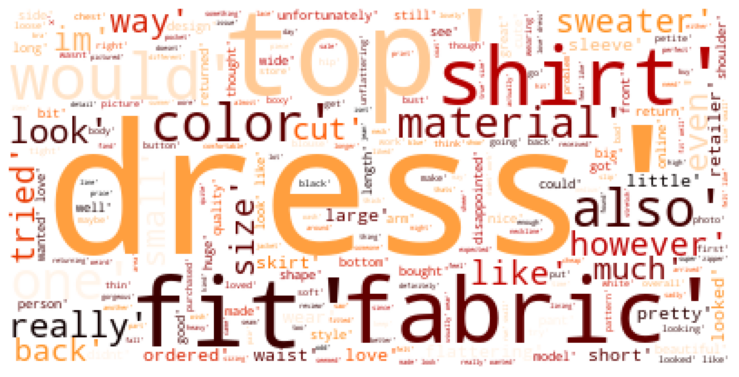

In [103]:
wordcloud = WordCloud(background_color="white", max_words =250, colormap='gist_heat').generate(str(neg_words))

plt.figure(figsize = (13, 13))
plt.imshow(wordcloud)
plt.axis("off")
plt.show()

## 7. SENTIMENT CLASSIFICATION WITH MACHINE LEARNING & DEEP LEARNING
Before moving on to modeling, as data preprocessing steps WE will need to perform vectorization and train-test split. But you will perform the vectorization for the first time.Machine learning algorithms most often take numeric feature vectors as input. Thus, when working with text documents, we need a way to convert each document into a numeric vector. This process is known as text vectorization. Commonly used vectorization approach that we will use here is to represent each text as a vector of word counts.

At this moment, we have our review text column as a token (which has no punctuations and stopwords). We can use Scikit-learn’s CountVectorizer to convert the text collection into a matrix of token counts. We can imagine this resulting matrix as a 2-D matrix, where each row is a unique word, and each column is a review.For Deep learning model, we will implement embedding layer for all words.After performing data preprocessing, we will build your models using following classification algorithms:


Logistic Regression,

Naive Bayes,

Support Vector Machine,

Random Forest,

Ada Boosting

Deep Learning Model.

### 7.1 Spliting of data in Train | Test

To run machine Learining algorithms we need to convert text into numarical feature vectors.We will use bag of word model for our analysis.


In [105]:
#Let's first we split the data into train and test set

In [106]:
df.head()

review_text  \
0                                                           like reviewer hesitant spend much pair jean however purchased retailer day andhonestlythey look good probably would paid full price jean fresh   
1  true bunch fall clothing photo color totally washed model image shame embroidery bright vivid totally unique bib area actually soft corduroy think nice transition fall winter term fit feel like ma...   
2                                                                                                                              wanted skirt work love design way way long small inch floor step skirt walk   
3  love love hesitant buy first review made seem big wasnt sure kind outfit wanted try jumpsuit perfect find x typical retailer size size good color fabulous fit great rise slightly short problem can...   
4  absolutely love retro look swimsuit first saw blogger amber fillerupclark barefoot blonde knew first one piece suit ive purchased six year ive avoided one piece one tried made feel frumpy monokini...   

   recommend_index   
0                 1  
1                 1  
2                 0  
3                 1  
4                 1

In [108]:
x = df["review_text"]
y = df["recommend_index "]

In [109]:
x_train,x_test,y_train,y_test = train_test_split(x,y,test_size = 0.2,random_state=101,stratify=y)

### 7.2 Vectorization

#### 7.2.1 Count Vectorization

In [111]:
from sklearn.feature_extraction.text import CountVectorizer

In [112]:
vectorizer = CountVectorizer()

x_train_count = vectorizer.fit_transform(x_train)
x_test_count = vectorizer.transform(x_test)

In [113]:
x_train_count.A    # toarray() also applicabale in place of A

array([[0, 0, 0, ..., 0, 0, 0],
       [0, 0, 0, ..., 0, 0, 0],
       [0, 0, 0, ..., 0, 0, 0],
       ...,
       [0, 0, 0, ..., 0, 0, 0],
       [0, 0, 0, ..., 0, 0, 0],
       [0, 0, 0, ..., 0, 0, 0]], dtype=int64)

In [114]:
vectorizer.get_feature_names()

['aa',
 'aaaaaaamazing',
 'aaaaandidontwanttopayforshipping',
 'aaaaannnnnnd',
 'aaaahmazing',
 'aaaahs',
 'aaahed',
 'aame',
 'ab',
 'abbey',
 'abby',
 'abck',
 'abdomen',
 'abercrombie',
 'abhor',
 'ability',
 'able',
 'abnormal',
 'abnormally',
 'abo',
 'abolutely',
 'abovetheknee',
 'abovetheshoulders',
 'abroad',
 'abruptly',
 'absence',
 'abso',
 'absolute',
 'absolutely',
 'absolutley',
 'absolutly',
 'absoluty',
 'abstract',
 'absurd',
 'absurdly',
 'abt',
 'abundance',
 'abundant',
 'abused',
 'ac',
 'acacia',
 'accent',
 'accented',
 'accenting',
 'accentuate',
 'accentuatea',
 'accentuated',
 'accentuates',
 'accentuating',
 'accept',
 'acceptabl',
 'acceptable',
 'acceptably',
 'accepted',
 'accepts',
 'access',
 'accesso',
 'accessorize',
 'accessorized',
 'accessorizes',
 'accessorizing',
 'accessory',
 'accident',
 'accidental',
 'accidentally',
 'acco',
 'accommodate',
 'accommodated',
 'accommodates',
 'accommodating',
 'accomodate',
 'accompanies',
 'accompany',
 'acc

In [124]:
x_train_DF = pd.DataFrame(x_train_count.A,columns = vectorizer.get_feature_names())

In [125]:
x_train_DF

aa  aaaaaaamazing  aaaaandidontwanttopayforshipping  aaaaannnnnnd  \
0       0              0                                 0             0   
1       0              0                                 0             0   
2       0              0                                 0             0   
3       0              0                                 0             0   
4       0              0                                 0             0   
...    ..            ...                               ...           ...   
18107   0              0                                 0             0   
18108   0              0                                 0             0   
18109   0              0                                 0             0   
18110   0              0                                 0             0   
18111   0              0                                 0             0   

       aaaahmazing  aaaahs  aaahed  aame  ab  abbey  abby  abck  abdomen  \
0                0       0       0     0   0      0     0     0        0   
1                0       0       0     0   0      0     0     0        0   
2                0       0       0     0   0      0     0     0        0   
3                0       0       0     0   0      0     0     0        0   
4                0       0       0     0   0      0     0     0        0   
...            ...     ...     ...   ...  ..    ...   ...   ...      ...   
18107            0       0       0     0   0      0     0     0        0   
18108            0       0       0     0   0      0     0     0        0   
18109            0       0       0     0   0      0     0     0        0   
18110            0       0       0     0   0      0     0     0        0   
18111            0       0       0     0   0      0     0     0        0   

       abercrombie  abhor  ability  able  abnormal  abnormally  abo  \
0                0      0        0     0         0           0    0   
1                0      0        0     0         0           0    0   
2                0      0        0     0         0           0    0   
3                0      0        0     0         0           0    0   
4                0      0        0     0         0           0    0   
...            ...    ...      ...   ...       ...         ...  ...   
18107            0      0        0     0         0           0    0   
18108            0      0        0     0         0           0    0   
18109            0      0        0     0         0           0    0   
18110            0      0        0     1         0           0    0   
18111            0      0        0     0         0           0    0   

       abolutely  abovetheknee  abovetheshoulders  abroad  abruptly  absence  \
0              0             0                  0       0         0        0   
1              0             0                  0       0         0        0   
2              0             0                  0       0         0        0   
3              0             0                  0       0         0        0   
4              0             0                  0       0         0        0   
...          ...           ...                ...     ...       ...      ...   
18107          0             0                  0       0         0        0   
18108          0             0                  0       0         0        0   
18109          0             0                  0       0         0        0   
18110          0             0                  0       0         0        0   
18111          0             0                  0       0         0        0   

       abso  absolute  absolutely  absolutley  absolutly  absoluty  abstract  \
0         0         0           0           0          0         0         0   
1         0         0           0           0          0         0         0   
2         0         0           0           0          0         0         0   
3         0         0           0           0  

#### 7.2.2 TF-IDF Vectorization

In [126]:
from sklearn.feature_extraction.text import TfidfVectorizer

In [128]:
tf_idf_vectorizer = TfidfVectorizer()
x_train_tf_idf = tf_idf_vectorizer.fit_transform(x_train)
x_test_tf_idf = tf_idf_vectorizer.transform(x_test)

In [130]:
x_train_tf_idf.A

array([[0., 0., 0., ..., 0., 0., 0.],
       [0., 0., 0., ..., 0., 0., 0.],
       [0., 0., 0., ..., 0., 0., 0.],
       ...,
       [0., 0., 0., ..., 0., 0., 0.],
       [0., 0., 0., ..., 0., 0., 0.],
       [0., 0., 0., ..., 0., 0., 0.]])

In [131]:
x_train_tf_DF = pd.DataFrame(x_train_tf_idf.A, columns = tf_idf_vectorizer.get_feature_names())

In [132]:
x_train_tf_DF

aa  aaaaaaamazing  aaaaandidontwanttopayforshipping  aaaaannnnnnd  \
0     0.00           0.00                              0.00          0.00   
1     0.00           0.00                              0.00          0.00   
2     0.00           0.00                              0.00          0.00   
3     0.00           0.00                              0.00          0.00   
4     0.00           0.00                              0.00          0.00   
...    ...            ...                               ...           ...   
18107 0.00           0.00                              0.00          0.00   
18108 0.00           0.00                              0.00          0.00   
18109 0.00           0.00                              0.00          0.00   
18110 0.00           0.00                              0.00          0.00   
18111 0.00           0.00                              0.00          0.00   

       aaaahmazing  aaaahs  aaahed  aame   ab  abbey  abby  abck  abdomen  \
0             0.00    0.00    0.00  0.00 0.00   0.00  0.00  0.00     0.00   
1             0.00    0.00    0.00  0.00 0.00   0.00  0.00  0.00     0.00   
2             0.00    0.00    0.00  0.00 0.00   0.00  0.00  0.00     0.00   
3             0.00    0.00    0.00  0.00 0.00   0.00  0.00  0.00     0.00   
4             0.00    0.00    0.00  0.00 0.00   0.00  0.00  0.00     0.00   
...            ...     ...     ...   ...  ...    ...   ...   ...      ...   
18107         0.00    0.00    0.00  0.00 0.00   0.00  0.00  0.00     0.00   
18108         0.00    0.00    0.00  0.00 0.00   0.00  0.00  0.00     0.00   
18109         0.00    0.00    0.00  0.00 0.00   0.00  0.00  0.00     0.00   
18110         0.00    0.00    0.00  0.00 0.00   0.00  0.00  0.00     0.00   
18111         0.00    0.00    0.00  0.00 0.00   0.00  0.00  0.00     0.00   

       abercrombie  abhor  ability  able  abnormal  abnormally  abo  \
0             0.00   0.00     0.00  0.00      0.00        0.00 0.00   
1             0.00   0.00     0.00  0.00      0.00        0.00 0.00   
2             0.00   0.00     0.00  0.00      0.00        0.00 0.00   
3             0.00   0.00     0.00  0.00      0.00        0.00 0.00   
4             0.00   0.00     0.00  0.00      0.00        0.00 0.00   
...            ...    ...      ...   ...       ...         ...  ...   
18107         0.00   0.00     0.00  0.00      0.00        0.00 0.00   
18108         0.00   0.00     0.00  0.00      0.00        0.00 0.00   
18109         0.00   0.00     0.00  0.00      0.00        0.00 0.00   
18110         0.00   0.00     0.00  0.22      0.00        0.00 0.00   
18111         0.00   0.00     0.00  0.00      0.00        0.00 0.00   

       abolutely  abovetheknee  abovetheshoulders  abroad  abruptly  absence  \
0           0.00          0.00               0.00    0.00      0.00     0.00   
1           0.00          0.00               0.00    0.00      0.00     0.00   
2           0.00          0.00               0.00    0.00      0.00     0.00   
3           0.00          0.00               0.00    0.00      0.00     0.00   
4           0.00          0.00               0.00    0.00      0.00     0.00   
...          ...           ...                ...     ...       ...      ...   
18107       0.00          0.00               0.00    0.00      0.00     0.00   
18108       0.00          0.00               0.00    0.00      0.00     0.00   
18109       0.00          0.00               0.00    0.00      0.00     0.00   
18110       0.00          0.00               0.00    0.00      0.00     0.00   
18111       0.00          0.00               0.00    0.00      0.00     0.00   

       abso  absolute  absolutely  absolutley  absolutly  absoluty  abstract  \
0      0.00      0.00        0.00        0.00       0.00      0.00      0.00   
1      0.00      0.00        0.00        0.00       0.00      0.00      0.00   
2      0.00      0.00        0.00        0.00       0.00      0.00      0.00   
3      0.00      0.00   

###### Before diving into modelling, we will create a User-Defined-Function for comparing models at the end.

In [138]:
from sklearn.metrics import confusion_matrix,classification_report,accuracy_score,f1_score,precision_score

In [134]:
def eval(model, x_train, x_test):
    y_pred = model.predict(x_test)
    y_pred_train = model.predict(x_train)
    
    print("Test_Set")
    print(classification_report(y_test, y_pred))
    print("Train_Set")
    print(classification_report(y_train, y_pred_train))
    fig, ax = plt.subplots(figsize=(8, 8))
    
    plot_confusion_matrix(model, x_test, y_test, ax=ax)

## 8. MACHHINE LEARNING MODELLING

### 8.1 Logistic Regression

###### 8.1.1 Logistic Regression with Count Vectorizor

In [135]:
log = LogisticRegression(C =0.6, max_iter=1000, class_weight= "balanced", random_state=101)
log.fit(x_train_count,y_train)

LogisticRegression(C=0.6, class_weight='balanced', max_iter=1000,
                   random_state=101)

LOG MODEL
Test_Set
              precision    recall  f1-score   support

           0       0.62      0.78      0.69       820
           1       0.95      0.89      0.92      3709

    accuracy                           0.87      4529
   macro avg       0.78      0.84      0.80      4529
weighted avg       0.89      0.87      0.88      4529

Train_Set
              precision    recall  f1-score   support

           0       0.74      0.97      0.84      3281
           1       0.99      0.93      0.96     14831

    accuracy                           0.93     18112
   macro avg       0.87      0.95      0.90     18112
weighted avg       0.95      0.93      0.94     18112



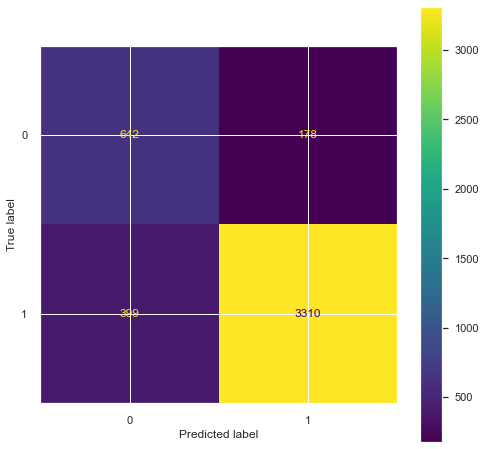

In [136]:
print("LOG MODEL")

eval(log, x_train_count, x_test_count)

In [139]:
from sklearn.metrics import make_scorer
from sklearn.model_selection import cross_val_score

custom_scorer = {'accuracy': make_scorer(accuracy_score),
                 'precision-0': make_scorer(precision_score, pos_label=0),
                 'recall-0': make_scorer(recall_score, pos_label=0),
                 'f1-0': make_scorer(f1_score, pos_label=0),
                 'precision-1': make_scorer(precision_score, pos_label=1),
                 'recall-1': make_scorer(recall_score, pos_label=1),
                 'f1-1': make_scorer(f1_score, pos_label=1)
                 }

for i, j in custom_scorer.items():
    model = LogisticRegression(C =0.6, max_iter=1000, class_weight= "balanced", random_state=101)
    scores = cross_val_score(model, x_train_count, y_train, cv = 10, scoring = j).mean()
    if i == "recall-1":
        log_count_rec = scores
    elif i == "f1-1":
        log_count_f1 = scores
    elif i == "accuracy":
        log_count_acc = scores
    print(f" {i:20} score for count : {scores}\n")

 accuracy             score for count : 0.8694791640002292

 precision-0          score for count : 0.6082249744025995

 recall-0             score for count : 0.7854335013714879

 f1-0                 score for count : 0.6855242965699603

 precision-1          score for count : 0.9492725701999369

 recall-1             score for count : 0.8880723673329177

 f1-1                 score for count : 0.9176483709325295



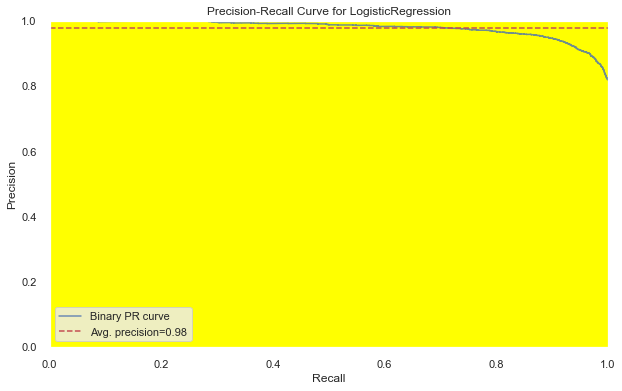

In [140]:
from yellowbrick.classifier import PrecisionRecallCurve
viz = PrecisionRecallCurve(
                            LogisticRegression(C =0.6, max_iter=1000, class_weight= "balanced", random_state=101),
                            classes=log.classes_,
                            per_class=True,
                            cmap="Set1"
                           )

fig, ax = plt.subplots(figsize=(10, 6))
ax.set_facecolor('yellow')

viz.fit(x_train_count,y_train)
viz.score(x_test_count, y_test)
viz.show();

In [142]:
log_AP_count = viz.score_

###### 8.1.2 Logistic Regression With TF-IDF Vectorizer


In [144]:
log = LogisticRegression(C=0.1, max_iter=1000, random_state=101, class_weight="balanced")

log.fit(x_train_tf_idf,y_train)

LogisticRegression(C=0.1, class_weight='balanced', max_iter=1000,
                   random_state=101)

LOG MODEL
Test_Set
              precision    recall  f1-score   support

           0       0.56      0.86      0.68       820
           1       0.96      0.85      0.90      3709

    accuracy                           0.85      4529
   macro avg       0.76      0.86      0.79      4529
weighted avg       0.89      0.85      0.86      4529

Train_Set
              precision    recall  f1-score   support

           0       0.57      0.89      0.69      3281
           1       0.97      0.85      0.91     14831

    accuracy                           0.86     18112
   macro avg       0.77      0.87      0.80     18112
weighted avg       0.90      0.86      0.87     18112



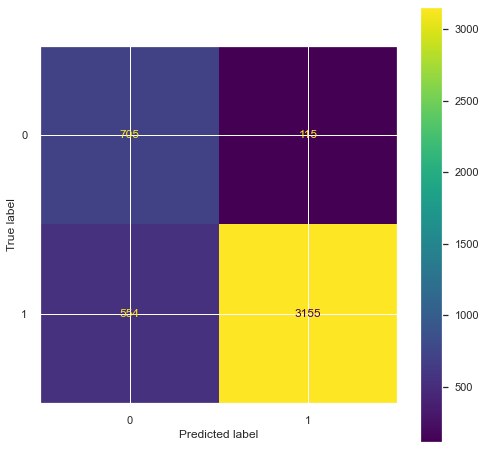

In [145]:
print("LOG MODEL")

eval(log, x_train_tf_idf, x_test_tf_idf)

In [146]:
custom_scorer = {'accuracy': make_scorer(accuracy_score),
                 'precision-0': make_scorer(precision_score, pos_label=0),
                 'recall-0': make_scorer(recall_score, pos_label=0),
                 'f1-0': make_scorer(f1_score, pos_label=0),
                 'precision-1': make_scorer(precision_score, pos_label=1),
                 'recall-1': make_scorer(recall_score, pos_label=1),
                 'f1-1': make_scorer(f1_score, pos_label=1)
                 }

for i, j in custom_scorer.items():
    LogisticRegression(C=0.1, max_iter=1000, random_state=101, class_weight="balanced")
    scores = cross_val_score(model, x_train_tf_idf, y_train, cv = 10, scoring = j).mean()
    if i == "recall-1":
        log_tfidf_rec = scores
    elif i == "f1-1":
        log_tfidf_f1 = scores
    elif i == "accuracy":
        log_tfidf_acc = scores
    print(f" {i:20} score for tfidf : {scores}\n")

 accuracy             score for tfidf : 0.8619695922514239

 precision-0          score for tfidf : 0.581322701710551

 recall-0             score for tfidf : 0.8515744310178665

 f1-0                 score for tfidf : 0.6909195972186082

 precision-1          score for tfidf : 0.9634041423273949

 recall-1             score for tfidf : 0.8642703106000985

 f1-1                 score for tfidf : 0.9111411320701667



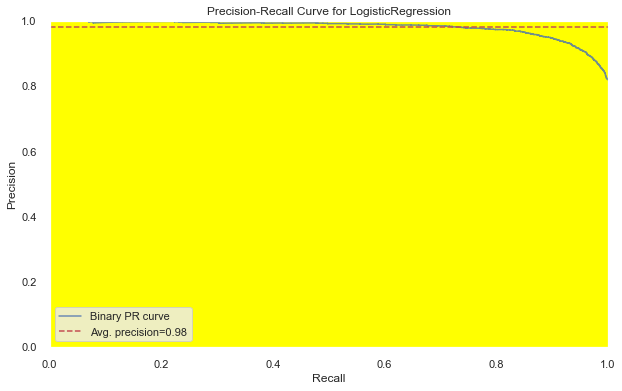

In [147]:
viz = PrecisionRecallCurve(
                            LogisticRegression(C=0.1, max_iter=1000, random_state=101, class_weight="balanced"),
                            classes=log.classes_,
                            per_class=True,
                            cmap="Set1"
                           )

fig, ax = plt.subplots(figsize=(10, 6))
ax.set_facecolor('yellow')

viz.fit(x_train_tf_idf,y_train)
viz.score(x_test_tf_idf, y_test)
viz.show();

In [ ]:
log_AP_tfidf = viz.score_

### 8.2 Naive Bayes

###### 8.2.1 Naive Bayes With Count Vectorizor

In [148]:
from sklearn.naive_bayes import MultinomialNB, BernoulliNB # BernoulliNB for binary m

In [149]:
nb = MultinomialNB()
nb.fit(x_train_count, y_train)

MultinomialNB()

NB MODEL
Test_Set
              precision    recall  f1-score   support

           0       0.74      0.63      0.68       820
           1       0.92      0.95      0.94      3709

    accuracy                           0.89      4529
   macro avg       0.83      0.79      0.81      4529
weighted avg       0.89      0.89      0.89      4529

Train_Set
              precision    recall  f1-score   support

           0       0.77      0.76      0.77      3281
           1       0.95      0.95      0.95     14831

    accuracy                           0.92     18112
   macro avg       0.86      0.85      0.86     18112
weighted avg       0.92      0.92      0.92     18112



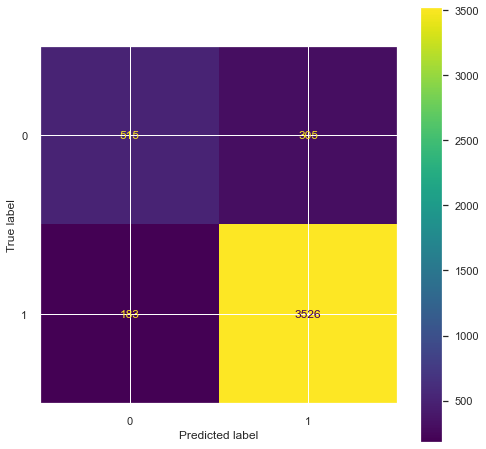

In [150]:
print("NB MODEL")

eval(nb, x_train_count, x_test_count)

In [151]:
custom_scorer = {'accuracy': make_scorer(accuracy_score),
                 'precision-0': make_scorer(precision_score, pos_label=0),
                 'recall-0': make_scorer(recall_score, pos_label=0),
                 'f1-0': make_scorer(f1_score, pos_label=0),
                 'precision-1': make_scorer(precision_score, pos_label=1),
                 'recall-1': make_scorer(recall_score, pos_label=1),
                 'f1-1': make_scorer(f1_score, pos_label=1)
                 }

for i, j in custom_scorer.items():
    model = MultinomialNB()
    scores = cross_val_score(model, x_train_count, y_train, cv = 10, scoring = j).mean()
    if i == "recall-1":
        nb_count_rec = scores
    elif i == "f1-1":
        nb_count_f1 = scores
    elif i == "accuracy":
        nb_count_acc = scores
    print(f" {i:20} score for count : {scores}\n")

 accuracy             score for count : 0.8827298651971092

 precision-0          score for count : 0.6866949177736903

 recall-0             score for count : 0.6491956408925792

 f1-0                 score for count : 0.667201772114158

 precision-1          score for count : 0.9233357440122489

 recall-1             score for count : 0.9343941126113927

 f1-1                 score for count : 0.9288186734094499



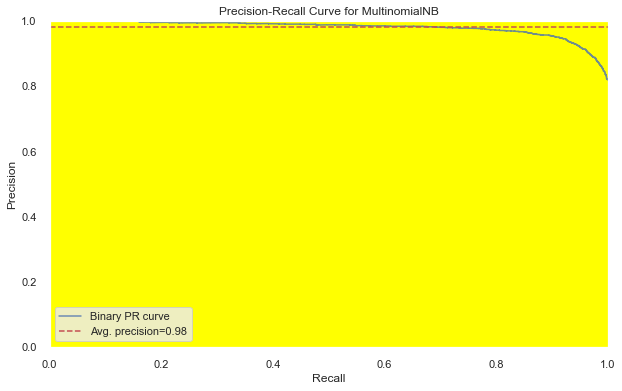

In [152]:
viz = PrecisionRecallCurve(
                            MultinomialNB(),
                            classes=nb.classes_,
                            per_class=True,
                            cmap="Set1"
                           )

fig, ax = plt.subplots(figsize=(10, 6))
ax.set_facecolor('yellow')

viz.fit(x_train_count,y_train)
viz.score(x_test_count, y_test)
viz.show();

In [ ]:
nb_AP_count = viz.score_

###### 8.2.2 Naive Bayes With TF-IDF Vectorizer

In [153]:
from sklearn.naive_bayes import MultinomialNB, BernoulliNB
nb = MultinomialNB()
nb.fit(x_train_tf_idf, y_train)

MultinomialNB()

NB MODEL
Test_Set
              precision    recall  f1-score   support

           0       1.00      0.02      0.04       820
           1       0.82      1.00      0.90      3709

    accuracy                           0.82      4529
   macro avg       0.91      0.51      0.47      4529
weighted avg       0.85      0.82      0.75      4529

Train_Set
              precision    recall  f1-score   support

           0       0.99      0.06      0.10      3281
           1       0.83      1.00      0.91     14831

    accuracy                           0.83     18112
   macro avg       0.91      0.53      0.50     18112
weighted avg       0.86      0.83      0.76     18112



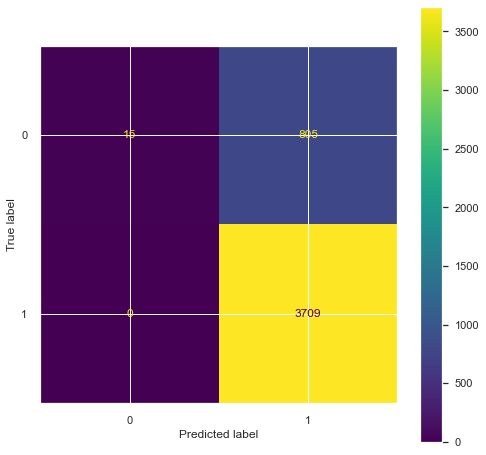

In [154]:
print("NB MODEL")
eval(nb, x_train_tf_idf, x_test_tf_idf)

In [155]:
custom_scorer = {'accuracy': make_scorer(accuracy_score),
                 'precision-0': make_scorer(precision_score, pos_label=0),
                 'recall-0': make_scorer(recall_score, pos_label=0),
                 'f1-0': make_scorer(f1_score, pos_label=0),
                 'precision-1': make_scorer(precision_score, pos_label=1),
                 'recall-1': make_scorer(recall_score, pos_label=1),
                 'f1-1': make_scorer(f1_score, pos_label=1)
                 }

for i, j in custom_scorer.items():
    model = BernoulliNB()
    scores = cross_val_score(model, x_train_tf_idf, y_train, cv = 10, scoring = j).mean()
    if i == "recall-1":
        nb_tfidf_rec = scores
    elif i == "f1-1":
        nb_tfidf_f1 = scores
    elif i == "accuracy":
        nb_tfidf_acc = scores
    print(f" {i:20} score for tfidf : {scores}\n")

 accuracy             score for tfidf : 0.8678226511275831

 precision-0          score for tfidf : 0.6569219975313368

 recall-0             score for tfidf : 0.5669211950478168

 f1-0                 score for tfidf : 0.6082746855975597

 precision-1          score for tfidf : 0.9070269993509317

 recall-1             score for tfidf : 0.9343937945411882

 f1-1                 score for tfidf : 0.9204889911441988



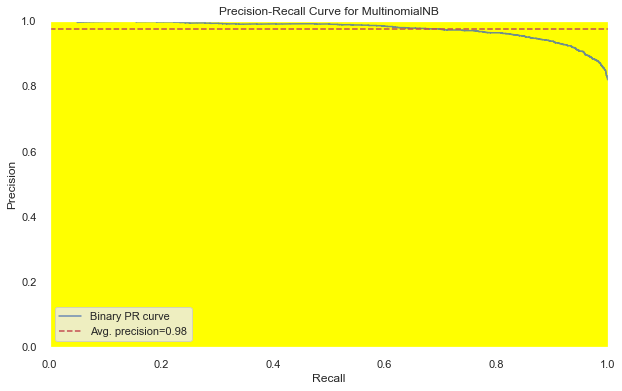

In [156]:
from yellowbrick.classifier import PrecisionRecallCurve

viz = PrecisionRecallCurve(
                            MultinomialNB(),
                            classes=nb.classes_,
                            per_class=True,
                            cmap="Set1"
                           )

fig, ax = plt.subplots(figsize=(10, 6))
ax.set_facecolor('yellow')

viz.fit(x_train_tf_idf, y_train)
viz.score(x_test_tf_idf, y_test)
viz.show();

### 8.3 Support Vector Machine (SVM)

###### 8.3.1 Support Vector Machine (SVM) With Count Vectorizor

In [157]:
from sklearn.svm import LinearSVC

svc = LinearSVC(C=0.01, class_weight="balanced", random_state=101)
svc.fit(x_train_count,y_train)

LinearSVC(C=0.01, class_weight='balanced', random_state=101)

SVC MODEL
Test_Set
              precision    recall  f1-score   support

           0       0.60      0.83      0.70       820
           1       0.96      0.88      0.92      3709

    accuracy                           0.87      4529
   macro avg       0.78      0.85      0.81      4529
weighted avg       0.89      0.87      0.88      4529

Train_Set
              precision    recall  f1-score   support

           0       0.66      0.93      0.77      3281
           1       0.98      0.89      0.94     14831

    accuracy                           0.90     18112
   macro avg       0.82      0.91      0.85     18112
weighted avg       0.92      0.90      0.91     18112



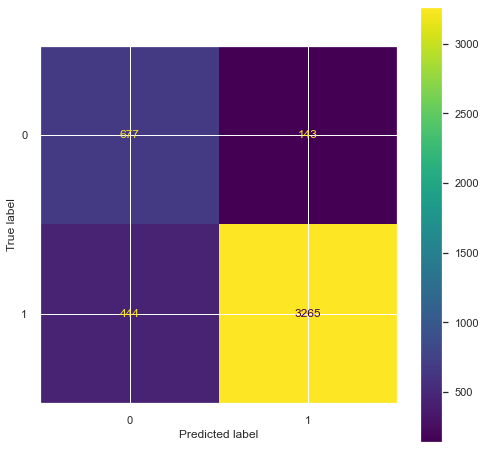

In [158]:
print("SVC MODEL")

eval(svc, x_train_count, x_test_count)

In [159]:
custom_scorer = {'accuracy': make_scorer(accuracy_score),
                 'precision-0': make_scorer(precision_score, pos_label=0),
                 'recall-0': make_scorer(recall_score, pos_label=0),
                 'f1-0': make_scorer(f1_score, pos_label=0),
                 'precision-1': make_scorer(precision_score, pos_label=1),
                 'recall-1': make_scorer(recall_score, pos_label=1),
                 'f1-1': make_scorer(f1_score, pos_label=1)
                 }

for i, j in custom_scorer.items():
    model = LinearSVC(C=0.01, class_weight="balanced", random_state=101)
    scores = cross_val_score(model, x_train_count, y_train, cv = 10, scoring = j).mean()
    if i == "recall-1":
        svc_count_rec = scores
    elif i == "f1-1":
        svc_count_f1 = scores
    elif i == "accuracy":
        svc_count_acc = scores
    print(f" {i:20} score for count : {scores}\n")

 accuracy             score for count : 0.8643441843626697

 precision-0          score for count : 0.5895108461205314

 recall-0             score for count : 0.8274992586552005

 f1-0                 score for count : 0.6884573374916576

 precision-1          score for count : 0.9581095681343685

 recall-1             score for count : 0.8724963785435292

 f1-1                 score for count : 0.9132911856470705



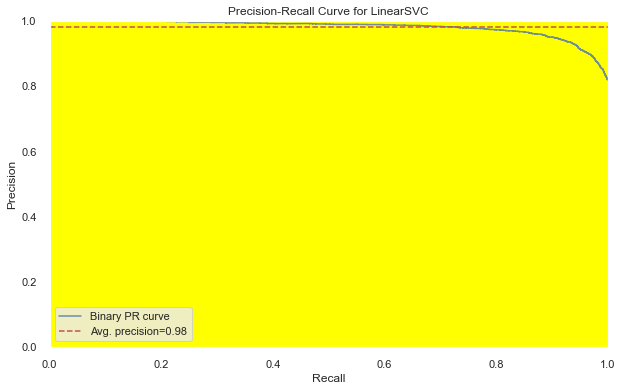

In [160]:
viz = PrecisionRecallCurve(
                            LinearSVC(C=0.01, class_weight="balanced", random_state=101),
                            classes=svc.classes_,
                            per_class=True,
                            cmap="Set1"
                           )

fig, ax = plt.subplots(figsize=(10, 6))
ax.set_facecolor('yellow')

viz.fit(x_train_count,y_train)
viz.score(x_test_count, y_test)
viz.show();


In [ ]:
svc_AP_count = viz.score_

###### 8.3.2 Support Vector Machine (SVM) With TF-IDF Vectorizer

In [161]:
svc = LinearSVC(C=0.01, class_weight="balanced", random_state=101)

svc.fit(x_train_tf_idf, y_train)

LinearSVC(C=0.01, class_weight='balanced', random_state=101)

SVC MODEL
Test_Set
              precision    recall  f1-score   support

           0       0.56      0.87      0.68       820
           1       0.97      0.85      0.90      3709

    accuracy                           0.85      4529
   macro avg       0.76      0.86      0.79      4529
weighted avg       0.89      0.85      0.86      4529

Train_Set
              precision    recall  f1-score   support

           0       0.56      0.89      0.69      3281
           1       0.97      0.85      0.91     14831

    accuracy                           0.86     18112
   macro avg       0.77      0.87      0.80     18112
weighted avg       0.90      0.86      0.87     18112



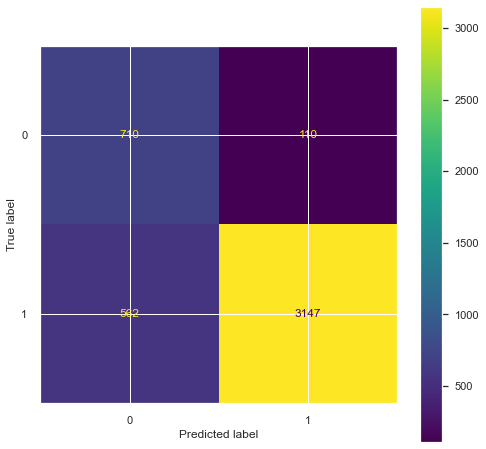

In [162]:
print("SVC MODEL")

eval(svc, x_train_tf_idf, x_test_tf_idf)

In [163]:
custom_scorer = {'accuracy': make_scorer(accuracy_score),
                 'precision-0': make_scorer(precision_score, pos_label=0),
                 'recall-0': make_scorer(recall_score, pos_label=0),
                 'f1-0': make_scorer(f1_score, pos_label=0),
                 'precision-1': make_scorer(precision_score, pos_label=1),
                 'recall-1': make_scorer(recall_score, pos_label=1),
                 'f1-1': make_scorer(f1_score, pos_label=1)
                 }

for i, j in custom_scorer.items():
    model = LinearSVC(C=0.01, class_weight="balanced", random_state=101)
    scores = cross_val_score(model, x_train_tf_idf, y_train, cv = 10, scoring = j).mean()
    if i == "recall-1":
        svc_tfidf_rec = scores
    elif i == "f1-1":
        svc_tfidf_f1 = scores
    elif i == "accuracy":
        svc_tfidf_acc = scores
    print(f" {i:20} score for tfidf : {scores}\n")

 accuracy             score for tfidf : 0.8430866436774045

 precision-0          score for tfidf : 0.5426981757021248

 recall-0             score for tfidf : 0.8534046259915486

 f1-0                 score for tfidf : 0.6634057538515924

 precision-1          score for tfidf : 0.9628688451545451

 recall-1             score for tfidf : 0.8408054537226027

 f1-1                 score for tfidf : 0.8976913895073949



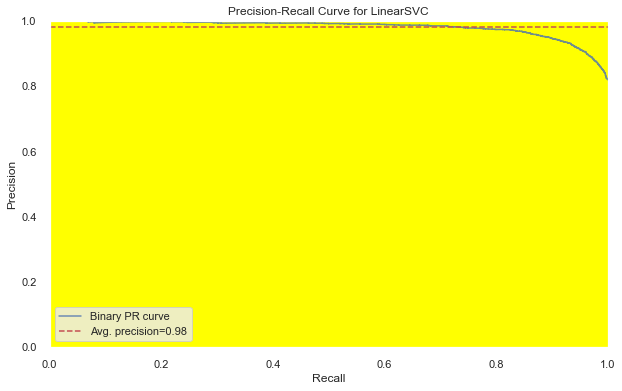

In [164]:
viz = PrecisionRecallCurve(
                            LinearSVC(C=0.01, class_weight="balanced", random_state=101),
                            classes=svc.classes_,
                            per_class=True,
                            cmap="Set1"
                           )

fig, ax = plt.subplots(figsize=(10, 6))
ax.set_facecolor('yellow')

viz.fit(x_train_tf_idf,y_train)
viz.score(x_test_tf_idf, y_test)
viz.show();

### 8.4 Random Forest

###### 8.4.1 Random Forest With Count Vectorizer

In [165]:
from sklearn.ensemble import RandomForestClassifier

rf = RandomForestClassifier(200, max_depth = 12, random_state = 42, n_jobs = -1, class_weight="balanced")
rf.fit(x_train_count, y_train)

RandomForestClassifier(class_weight='balanced', max_depth=12, n_estimators=200,
                       n_jobs=-1, random_state=42)

RF MODEL
Test_Set
              precision    recall  f1-score   support

           0       0.59      0.80      0.68       820
           1       0.95      0.88      0.91      3709

    accuracy                           0.86      4529
   macro avg       0.77      0.84      0.80      4529
weighted avg       0.89      0.86      0.87      4529

Train_Set
              precision    recall  f1-score   support

           0       0.64      0.89      0.75      3281
           1       0.97      0.89      0.93     14831

    accuracy                           0.89     18112
   macro avg       0.81      0.89      0.84     18112
weighted avg       0.91      0.89      0.90     18112



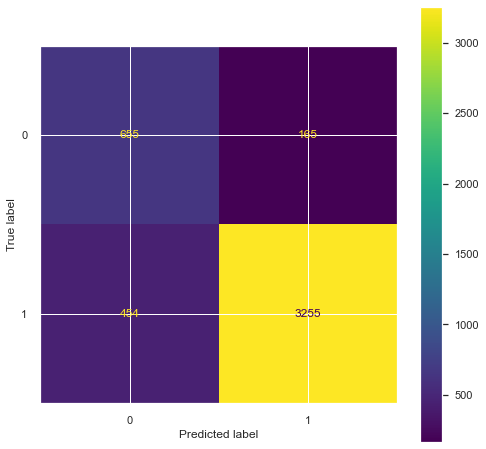

In [166]:
print("RF MODEL")

eval(rf, x_train_count, x_test_count)

In [167]:
custom_scorer = {'accuracy': make_scorer(accuracy_score),
                 'precision-0': make_scorer(precision_score, pos_label=0),
                 'recall-0': make_scorer(recall_score, pos_label=0),
                 'f1-0': make_scorer(f1_score, pos_label=0),
                 'precision-1': make_scorer(precision_score, pos_label=1),
                 'recall-1': make_scorer(recall_score, pos_label=1),
                 'f1-1': make_scorer(f1_score, pos_label=1)
                 }

for i, j in custom_scorer.items():
    model = RandomForestClassifier(200, max_depth = 12, random_state = 42, n_jobs = -1, class_weight="balanced")
    scores = cross_val_score(model, x_train_count, y_train, cv = 10, scoring = j).mean()
    if i == "recall-1":
        rf_count_rec = scores
    elif i == "f1-1":
        rf_count_f1 = scores
    elif i == "accuracy":
        rf_count_acc= scores
    print(f" {i:20} score for count : {scores}\n")

 accuracy             score for count : 0.8532460753087279

 precision-0          score for count : 0.5692722751927011

 recall-0             score for count : 0.7820835495588998

 f1-0                 score for count : 0.6588434615404516

 precision-1          score for count : 0.9474449769608053

 recall-1             score for count : 0.8689897908552089

 f1-1                 score for count : 0.9065110376144284



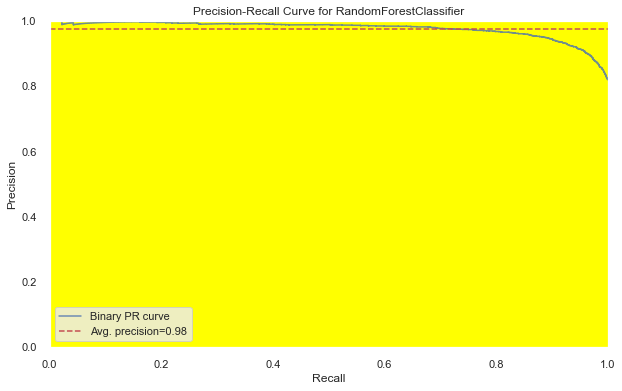

In [168]:
viz = PrecisionRecallCurve(
                            RandomForestClassifier(200, max_depth = 12, random_state = 42, n_jobs = -1, class_weight="balanced"),
                            classes=rf.classes_,
                            per_class=True,
                            cmap="Set1"
                           )

fig, ax = plt.subplots(figsize=(10, 6))
ax.set_facecolor('yellow')

viz.fit(x_train_count,y_train)
viz.score(x_test_count, y_test)
viz.show();

###### 8.4.2 Random Forest With TF-IDF Vectorizer

In [169]:
rf = RandomForestClassifier(200, max_depth = 10, random_state = 42, n_jobs = -1, class_weight="balanced")

rf.fit(x_train_tf_idf, y_train)

RandomForestClassifier(class_weight='balanced', max_depth=10, n_estimators=200,
                       n_jobs=-1, random_state=42)

RF MODEL
Test_Set
              precision    recall  f1-score   support

           0       0.55      0.79      0.65       820
           1       0.95      0.86      0.90      3709

    accuracy                           0.85      4529
   macro avg       0.75      0.83      0.78      4529
weighted avg       0.88      0.85      0.86      4529

Train_Set
              precision    recall  f1-score   support

           0       0.59      0.91      0.71      3281
           1       0.98      0.86      0.91     14831

    accuracy                           0.87     18112
   macro avg       0.78      0.88      0.81     18112
weighted avg       0.91      0.87      0.88     18112



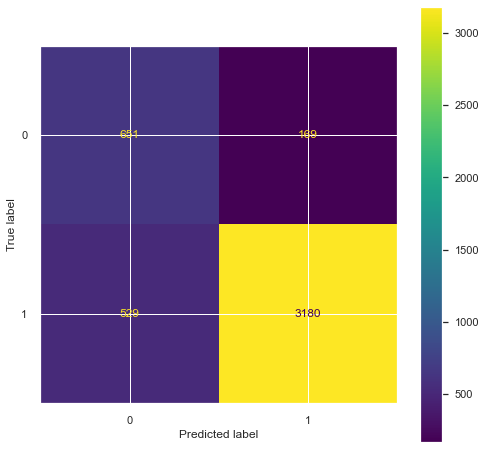

In [170]:
print("RF MODEL")

eval(rf, x_train_tf_idf, x_test_tf_idf)

In [171]:
custom_scorer = {'accuracy': make_scorer(accuracy_score),
                 'precision-0': make_scorer(precision_score, pos_label=0),
                 'recall-0': make_scorer(recall_score, pos_label=0),
                 'f1-0': make_scorer(f1_score, pos_label=0),
                 'precision-1': make_scorer(precision_score, pos_label=1),
                 'recall-1': make_scorer(recall_score, pos_label=1),
                 'f1-1': make_scorer(f1_score, pos_label=1)
                 }

for i, j in custom_scorer.items():
    model = RandomForestClassifier(200, max_depth = 10, random_state = 42, n_jobs = -1, class_weight="balanced")
    scores = cross_val_score(model, x_train_tf_idf, y_train, cv = 10, scoring = j).mean()
    if i == "recall-1":
        rf_tfidf_rec = scores
    elif i == "f1-1":
        rf_tfidf_f1 = scores
    elif i == "accuracy":
        rf_tfidf_acc = scores
    print(f" {i:20} score for tfidf : {scores}\n")

 accuracy             score for tfidf : 0.8350252869696227

 precision-0          score for tfidf : 0.5302792196564281

 recall-0             score for tfidf : 0.7945789161539032

 f1-0                 score for tfidf : 0.6358807731787169

 precision-1          score for tfidf : 0.9489135907680668

 recall-1             score for tfidf : 0.8439739782221876

 f1-1                 score for tfidf : 0.8933366243536531



In [ ]:
viz = PrecisionRecallCurve(
                            RandomForestClassifier(200, max_depth = 10, random_state = 42, n_jobs = -1, class_weight="balanced"),
                            classes=rf.classes_,
                            per_class=True,
                            cmap="Set1"
                           )

fig, ax = plt.subplots(figsize=(10, 6))
ax.set_facecolor('yellow')

viz.fit(x_train_tf_idf,y_train)
viz.score(x_test_tf_idf, y_test)
viz.show();

In [ ]:
rf_AP_tfidf = viz.score_

### 8.5 Ada Boosting

###### 8.5.1 Ada Boosting With Count Vector

In [172]:
from sklearn.ensemble import AdaBoostClassifier

ada = AdaBoostClassifier(n_estimators= 500, random_state = 42)
ada.fit(x_train_count, y_train)

AdaBoostClassifier(n_estimators=500, random_state=42)

Ada MODEL
Test_Set
              precision    recall  f1-score   support

           0       0.73      0.56      0.64       820
           1       0.91      0.95      0.93      3709

    accuracy                           0.88      4529
   macro avg       0.82      0.76      0.78      4529
weighted avg       0.88      0.88      0.88      4529

Train_Set
              precision    recall  f1-score   support

           0       0.80      0.66      0.72      3281
           1       0.93      0.96      0.95     14831

    accuracy                           0.91     18112
   macro avg       0.86      0.81      0.83     18112
weighted avg       0.90      0.91      0.91     18112



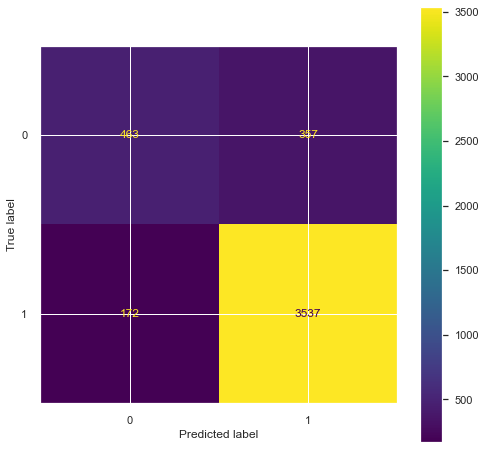

In [173]:
print("Ada MODEL")

eval(ada, x_train_count, x_test_count)

In [174]:
custom_scorer = {'accuracy': make_scorer(accuracy_score),
                 'precision-0': make_scorer(precision_score, pos_label=0),
                 'recall-0': make_scorer(recall_score, pos_label=0),
                 'f1-0': make_scorer(f1_score, pos_label=0),
                 'precision-1': make_scorer(precision_score, pos_label=1),
                 'recall-1': make_scorer(recall_score, pos_label=1),
                 'f1-1': make_scorer(f1_score, pos_label=1)
                 }

for i, j in custom_scorer.items():
    model = AdaBoostClassifier(n_estimators= 500, random_state = 42)
    scores = cross_val_score(model, x_train_count, y_train, cv = 10, scoring = j).mean()
    if i == "recall-1":
        ada_count_rec = scores
    elif i == "f1-1":
        ada_count_f1 = scores
    elif i == "accuracy":
        ada_count_acc = scores
    print(f" {i:20} score for count : {scores}\n")

 accuracy             score for count : 0.877704956099773

 precision-0          score for count : 0.6998312858830731

 recall-0             score for count : 0.5699449551486395

 f1-0                 score for count : 0.627959605871791

 precision-1          score for count : 0.9086203551362712

 recall-1             score for count : 0.9457892503176157

 f1-1                 score for count : 0.9268189492442745



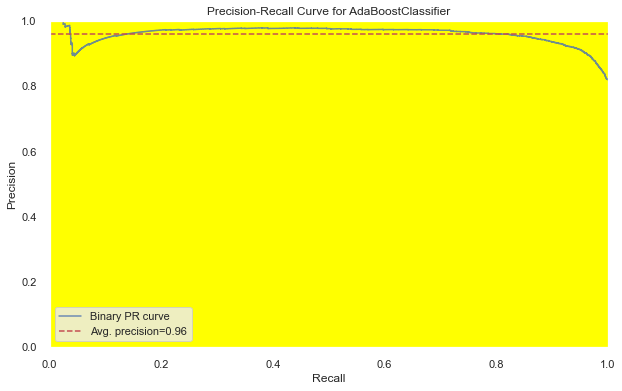

In [177]:
viz = PrecisionRecallCurve(
                            AdaBoostClassifier(n_estimators= 500, random_state = 42),
                            classes=ada.classes_,
                            per_class=True,
                            cmap="Set1"
                           )

fig, ax = plt.subplots(figsize=(10, 6))
ax.set_facecolor('yellow')

viz.fit(x_train_count,y_train)
viz.score(x_test_count, y_test)
viz.show();

In [ ]:
ada_AP_count = viz.score_

###### 8.5.2 Ada boost with TF-IDF vectorizer

In [178]:
ada = AdaBoostClassifier(n_estimators= 500, random_state = 42)

ada.fit(x_train_tf_idf, y_train)

AdaBoostClassifier(n_estimators=500, random_state=42)

Ada MODEL
Test_Set
              precision    recall  f1-score   support

           0       0.71      0.58      0.64       820
           1       0.91      0.95      0.93      3709

    accuracy                           0.88      4529
   macro avg       0.81      0.76      0.78      4529
weighted avg       0.87      0.88      0.88      4529

Train_Set
              precision    recall  f1-score   support

           0       0.82      0.71      0.76      3281
           1       0.94      0.97      0.95     14831

    accuracy                           0.92     18112
   macro avg       0.88      0.84      0.86     18112
weighted avg       0.92      0.92      0.92     18112



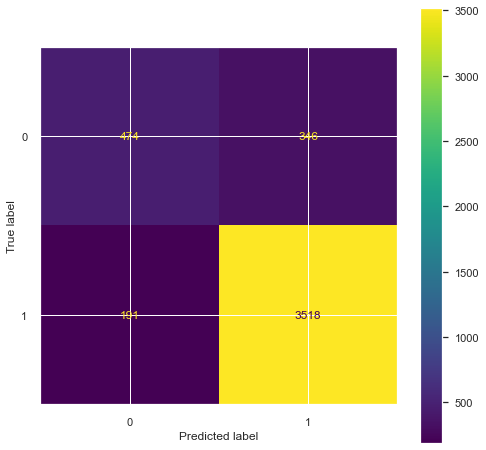

In [179]:
print("Ada MODEL")

eval(ada, x_train_tf_idf,x_test_tf_idf)

In [ ]:
custom_scorer = {'accuracy': make_scorer(accuracy_score),
                 'precision-0': make_scorer(precision_score, pos_label=0),
                 'recall-0': make_scorer(recall_score, pos_label=0),
                 'f1-0': make_scorer(f1_score, pos_label=0),
                 'precision-1': make_scorer(precision_score, pos_label=1),
                 'recall-1': make_scorer(recall_score, pos_label=1),
                 'f1-1': make_scorer(f1_score, pos_label=1)
                 }

for i, j in custom_scorer.items():
    model =AdaBoostClassifier(n_estimators= 500, random_state = 42)
    scores = cross_val_score(model, x_train_tf_idf, y_train, cv = 10, scoring = j).mean()
    if i == "recall-1":
        ada_tfidf_rec = scores
    elif i == "f1-1":
        ada_tfidf_f1 = scores
    elif i == "accuracy":
        ada_tfidf_acc = scores
    print(f" {i:20} score for tfidf : {scores}\n")

 accuracy             score for tfidf : 0.874061596839525



In [ ]:
viz = PrecisionRecallCurve(
                            AdaBoostClassifier(n_estimators= 500, random_state = 42),
                            classes=ada.classes_,
                            per_class=True,
                            cmap="Set1"
                           )

fig, ax = plt.subplots(figsize=(10, 6))
ax.set_facecolor('yellow')

viz.fit(x_train_tf_idf,y_train)
viz.score(x_test_tf_idf, y_test)
viz.show();

In [ ]:
ada_AP_tfidf = viz.score_